In [1]:
import warnings
warnings.filterwarnings('ignore')

# Prepare the Dataset

In [2]:
dataset_name = 'fashion MNIST'

In [3]:
import numpy as np
from skimage.color import grey2rgb
from keras.datasets import fashion_mnist
(X, y), (X_test, y_test) = fashion_mnist.load_data()
X = np.concatenate((X, X_test))
y = np.concatenate((y, y_test))
imgs = X
del X_test
del y_test

imgs = X

X = np.array(list(map(lambda x: grey2rgb(x), X)), dtype=np.float32)
X = X.astype(np.float32)/ 255.0

print('Dataset size {}'.format(X.shape))

Using TensorFlow backend.


Dataset size (70000, 28, 28, 3)


## Dimension Reduction for plotting

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.reshape((X.shape[0], -1)))


## Plotting the original data set

In [6]:
import random
randomindexs = list()
for i in range(6000):
    randomindexs.append(random.randint(0,len(X_pca)-1))

In [7]:
from _utils.plots import plot_dataset

In [8]:
labels = ['T-shirt', 'Pants', 'Shirt', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

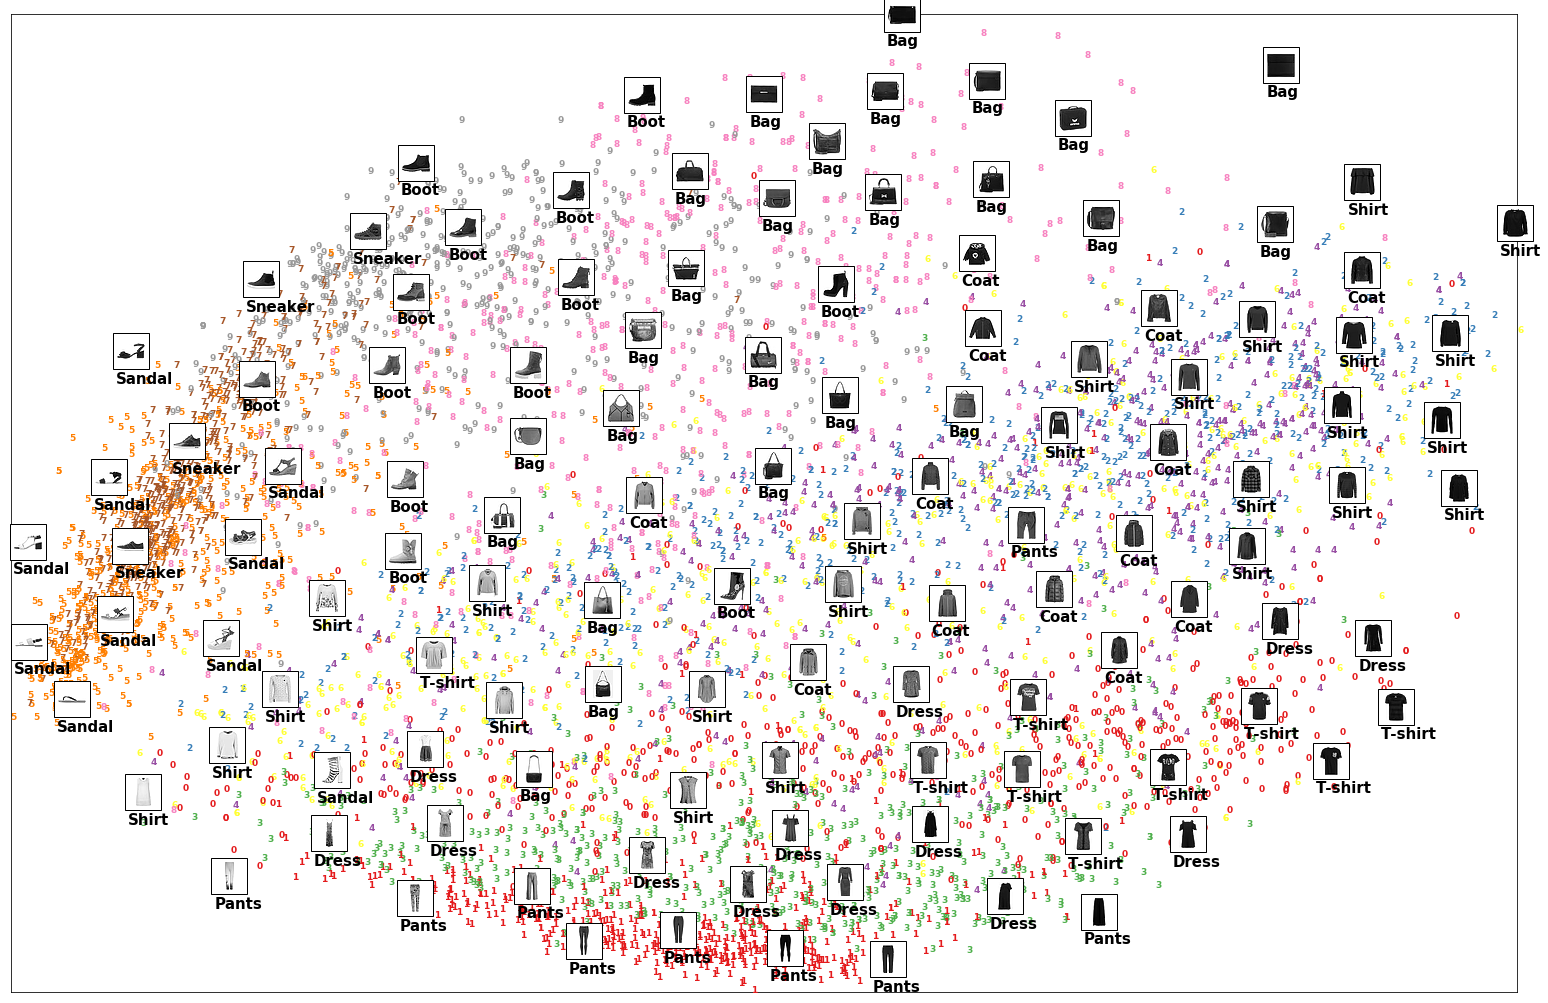

In [9]:
plot_dataset(X_pca[randomindexs], y[randomindexs],images=imgs[randomindexs], labels=labels)

## Linear Separability Analysis

https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html

https://www.cs.waikato.ac.nz/~eibe/pubs/chains.pdf

In [10]:
%load_ext autoreload
%autoreload 2

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

from _utils.plots import plot_transform_hyperplanes

cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.132
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.13466666666666666


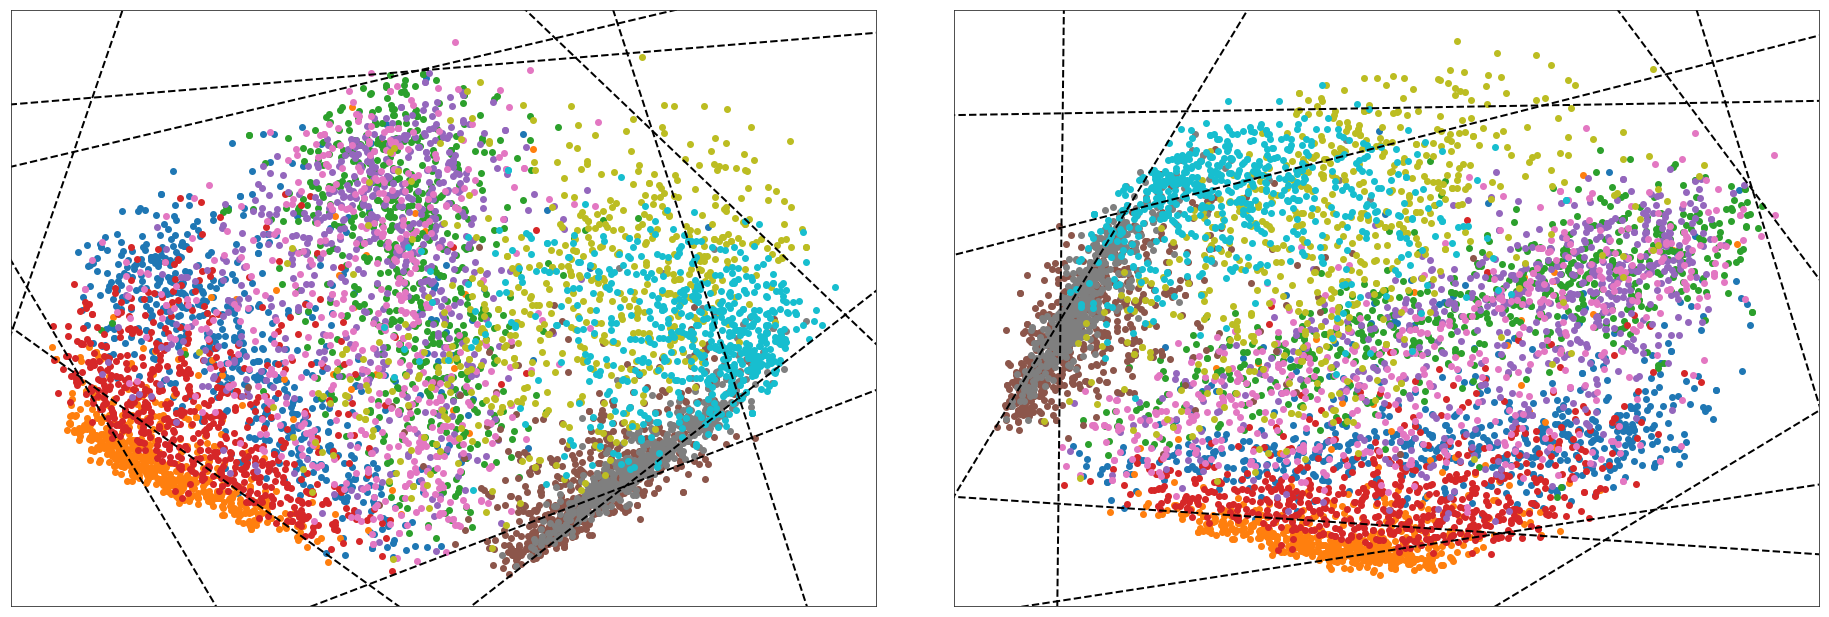

In [12]:
plot_transform_hyperplanes(X_pca[randomindexs], pd.get_dummies(y[randomindexs]).values)

# tSNE embedding transforamtion

https://lvdmaaten.github.io/tsne/

https://github.com/KlugerLab/FIt-SNE

https://github.com/spotify/annoy

http://www.fftw.org/    

In [13]:
from FIt_SNE.fast_tsne import fast_tsne

In [14]:
Z_embedded1 = fast_tsne(X.reshape((X.shape[0], -1)), 
                         learning_rate=1000, max_iter=5000,
                         n_trees=500, perplexity=100,
                         initialization=X_pca, 
                         df=1,
                         early_exag_coeff=15,  
                         late_exag_coeff=5)

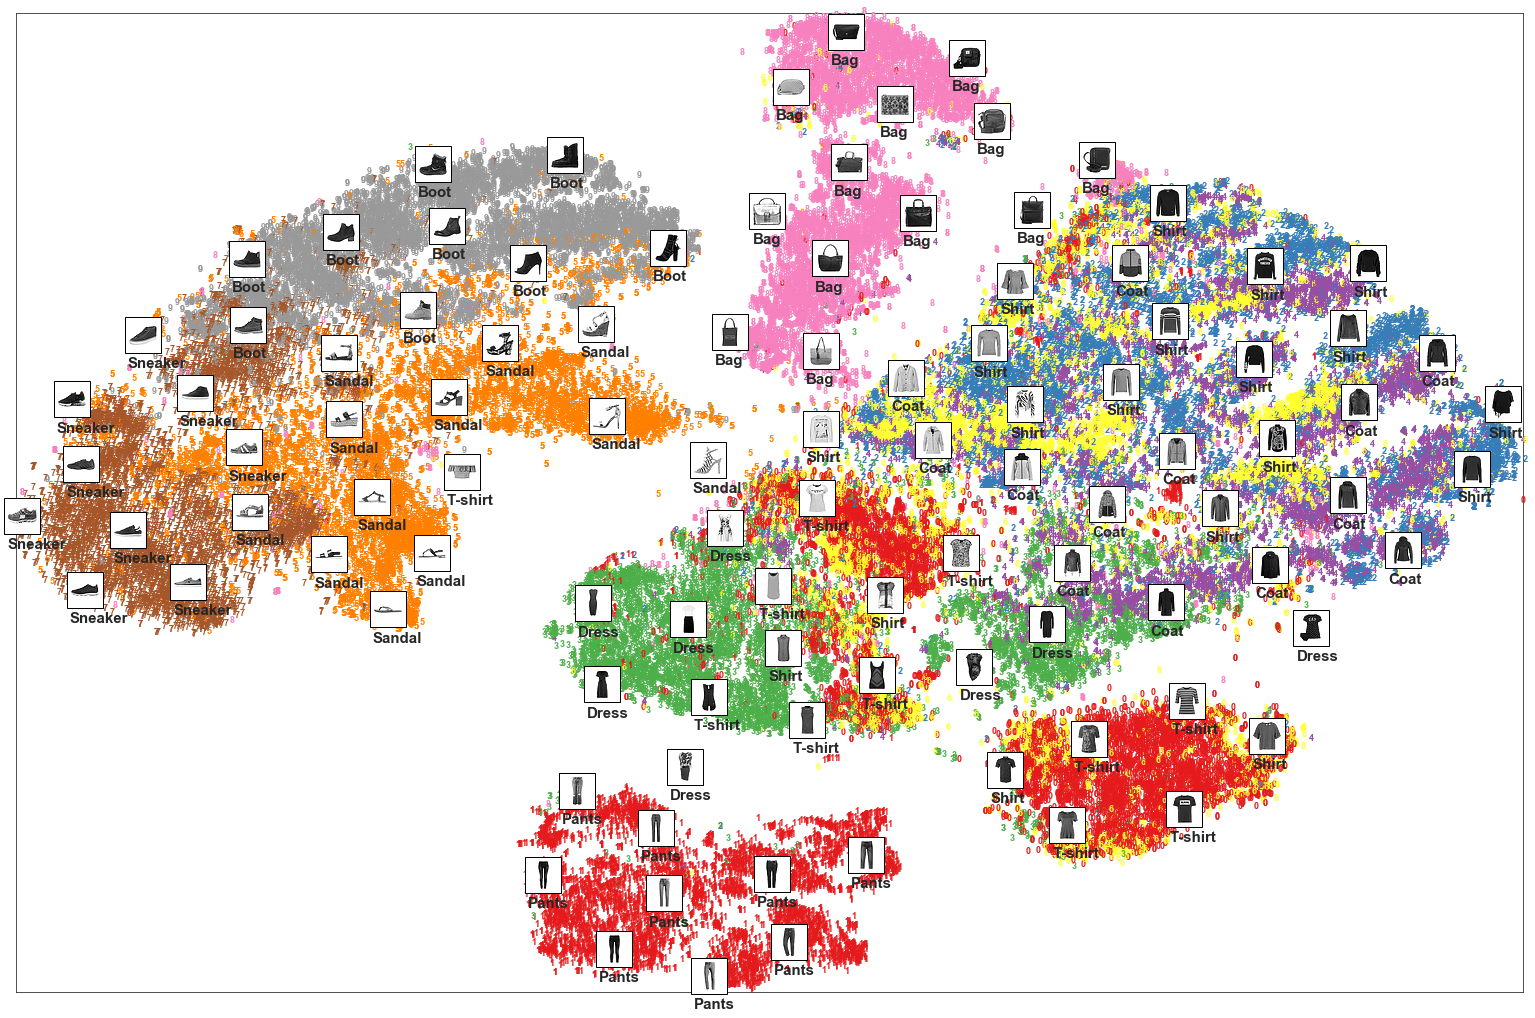

In [15]:
plot_dataset(Z_embedded1, y,images=imgs, labels=labels)

In [16]:
Z_embedded = fast_tsne(X.reshape((X.shape[0], -1)), 
                         learning_rate=1000, max_iter=5000,
                         n_trees=500, perplexity=100,
                         initialization=X_pca, 
                         df=0.4,
                         early_exag_coeff=15,  
                         late_exag_coeff=5)

In [17]:
#Z1 = fast_tsne(X.reshape((X.shape[0], -1)), 
#                         learning_rate=1000,
#                         n_trees=100,
#                         initialization=X_pca, 
#                         df=0.4,
#                         late_exag_coeff=5)
#

#=============== t-SNE v1.1.0 ===============
#fast_tsne data_path: data.dat
#fast_tsne result_path: result.dat
#fast_tsne nthreads: 12
#Read the following parameters:
##########n 70000 by d 2352 dataset, theta 0.500000,
##########perplexity 100.000000, no_dims 2, max_iter 5000,
##########stop_lying_iter 250, mom_switch_iter 250,
##########momentum 0.500000, final_momentum 0.800000,
##########learning_rate 1000.000000, K -1, sigma -1.000000, nbody_algo 2,
##########knn_algo 1, early_exag_coeff 15.000000,
##########no_momentum_during_exag 0, n_trees 500, search_k 150000,
##########start_late_exag_iter -1, late_exag_coeff 5.000000
##########nterms 3, interval_per_integer 1.000000, min_num_intervals 50, t-dist df 0.400000
#Read the 70000 x 2352 data matrix successfully. X[0,0] = 0.000000
#Read the initialization successfully.
#Will use momentum during exaggeration phase
#Computing input similarities...
#Using perplexity, so normalizing input data (to prevent numerical problems)
#Using perplexity, not the manually set kernel width.  K (number of nearest neighbors) and sigma (bandwidth) parameters are going to be ignored.
#Using ANNOY for knn search, with parameters: n_trees 500 and search_k 150000
#Going to allocate memory. N: 70000, K: 300, N*K = 21000000
#Building Annoy tree...
#Done building tree. Beginning nearest neighbor search...
#parallel (12 threads):
#[===========================================================>] 99% 531.901s
#Symmetrizing...
#Using the given initialization.
#Exaggerating Ps by 15.000000
#Input similarities computed (sparsity = 0.006499)!
#Learning embedding...
#Using FIt-SNE approximation.
#Iteration 50 (50 iterations in 2.60 seconds), cost 4.615491
#Iteration 100 (50 iterations in 2.57 seconds), cost 4.700452
#Iteration 150 (50 iterations in 2.55 seconds), cost 4.741563
#Iteration 200 (50 iterations in 2.58 seconds), cost 4.826317
#Iteration 250 (50 iterations in 2.69 seconds), cost 4.871500
#Unexaggerating Ps by 15.000000
#Iteration 300 (50 iterations in 2.63 seconds), cost 4.597698
#Iteration 350 (50 iterations in 2.59 seconds), cost 4.505671
#Iteration 400 (50 iterations in 2.58 seconds), cost 4.430489
#Iteration 450 (50 iterations in 2.58 seconds), cost 4.358211
#Iteration 500 (50 iterations in 2.58 seconds), cost 4.292831
#Iteration 550 (50 iterations in 2.69 seconds), cost 4.229830
#Iteration 600 (50 iterations in 2.57 seconds), cost 4.179609
#Iteration 650 (50 iterations in 2.74 seconds), cost 4.132276
#Iteration 700 (50 iterations in 2.79 seconds), cost 4.089375
#Iteration 750 (50 iterations in 2.93 seconds), cost 4.046857
#Iteration 800 (50 iterations in 3.24 seconds), cost 4.016194
#Iteration 850 (50 iterations in 3.30 seconds), cost 3.983670
#Iteration 900 (50 iterations in 3.44 seconds), cost 3.952760
#Iteration 950 (50 iterations in 3.83 seconds), cost 3.924510
#Iteration 1000 (50 iterations in 4.68 seconds), cost 3.899723
#Iteration 1050 (50 iterations in 4.05 seconds), cost 3.875858
#Iteration 1100 (50 iterations in 3.95 seconds), cost 3.853037
#Iteration 1150 (50 iterations in 4.30 seconds), cost 3.831540
#Iteration 1200 (50 iterations in 4.91 seconds), cost 3.814111
#Iteration 1250 (50 iterations in 4.84 seconds), cost 3.794895
#Iteration 1300 (50 iterations in 5.19 seconds), cost 3.778320
#Iteration 1350 (50 iterations in 5.26 seconds), cost 3.763119
#Iteration 1400 (50 iterations in 5.67 seconds), cost 3.747653
#Iteration 1450 (50 iterations in 5.77 seconds), cost 3.733711
#Iteration 1500 (50 iterations in 6.30 seconds), cost 3.720077
#Iteration 1550 (50 iterations in 6.55 seconds), cost 3.708433
#Iteration 1600 (50 iterations in 6.83 seconds), cost 3.697443
#Iteration 1650 (50 iterations in 7.36 seconds), cost 3.684778
#Iteration 1700 (50 iterations in 7.39 seconds), cost 3.676769
#Iteration 1750 (50 iterations in 8.83 seconds), cost 3.666045
#Iteration 1800 (50 iterations in 8.74 seconds), cost 3.656625
#Iteration 1850 (50 iterations in 8.78 seconds), cost 3.646531
#Iteration 1900 (50 iterations in 8.77 seconds), cost 3.639853
#Iteration 1950 (50 iterations in 8.75 seconds), cost 3.630079
#Iteration 2000 (50 iterations in 8.80 seconds), cost 3.622215
#Iteration 2050 (50 iterations in 10.34 seconds), cost 3.616401
#Iteration 2100 (50 iterations in 10.91 seconds), cost 3.608481
#Iteration 2150 (50 iterations in 10.90 seconds), cost 3.603502
#Iteration 2200 (50 iterations in 10.88 seconds), cost 3.596859
#Iteration 2250 (50 iterations in 10.94 seconds), cost 3.588968
#Iteration 2300 (50 iterations in 10.95 seconds), cost 3.583975
#Iteration 2350 (50 iterations in 10.90 seconds), cost 3.578821
#Iteration 2400 (50 iterations in 19.83 seconds), cost 3.573086
#Iteration 2450 (50 iterations in 21.06 seconds), cost 3.569211
#Iteration 2500 (50 iterations in 17.86 seconds), cost 3.567925
#Iteration 2550 (50 iterations in 18.16 seconds), cost 3.565223
#Iteration 2600 (50 iterations in 28.61 seconds), cost 3.564308
#Iteration 2650 (50 iterations in 21.75 seconds), cost 3.563542
#Iteration 2700 (50 iterations in 21.67 seconds), cost 3.560960
#Iteration 2750 (50 iterations in 27.16 seconds), cost 3.560328
#Iteration 2800 (50 iterations in 22.76 seconds), cost 3.560521
#Iteration 2850 (50 iterations in 34.18 seconds), cost 3.557833
#Iteration 2900 (50 iterations in 14.39 seconds), cost 3.557506
#Iteration 2950 (50 iterations in 29.86 seconds), cost 3.557462
#Iteration 3000 (50 iterations in 23.61 seconds), cost 3.557868
#Iteration 3050 (50 iterations in 24.55 seconds), cost 3.555380
#Iteration 3100 (50 iterations in 16.65 seconds), cost 3.555006
#Iteration 3150 (50 iterations in 27.95 seconds), cost 3.557419
#Iteration 3200 (50 iterations in 21.98 seconds), cost 3.552257
#Iteration 3250 (50 iterations in 31.01 seconds), cost 3.554121
#Iteration 3300 (50 iterations in 25.66 seconds), cost 3.552048
#Iteration 3350 (50 iterations in 28.15 seconds), cost 3.551678
#Iteration 3400 (50 iterations in 21.20 seconds), cost 3.551507
#Iteration 3450 (50 iterations in 27.98 seconds), cost 3.550278
#Iteration 3500 (50 iterations in 20.15 seconds), cost 3.548925
#Iteration 3550 (50 iterations in 31.31 seconds), cost 3.549049
#Iteration 3600 (50 iterations in 34.27 seconds), cost 3.548802
#Iteration 3650 (50 iterations in 25.77 seconds), cost 3.548466
#Iteration 3700 (50 iterations in 33.23 seconds), cost 3.547427
#Iteration 3750 (50 iterations in 23.58 seconds), cost 3.544466
#Iteration 3800 (50 iterations in 33.65 seconds), cost 3.545430
#Iteration 3850 (50 iterations in 23.83 seconds), cost 3.542818
#Iteration 3900 (50 iterations in 28.45 seconds), cost 3.543467
#Iteration 3950 (50 iterations in 21.46 seconds), cost 3.542884
#Iteration 4000 (50 iterations in 34.61 seconds), cost 3.540953
#Iteration 4050 (50 iterations in 33.30 seconds), cost 3.541792
#Iteration 4100 (50 iterations in 36.16 seconds), cost 3.541391
#Iteration 4150 (50 iterations in 23.31 seconds), cost 3.540302
#Iteration 4200 (50 iterations in 43.77 seconds), cost 3.538502
#Iteration 4250 (50 iterations in 44.48 seconds), cost 3.539347
#Iteration 4300 (50 iterations in 22.66 seconds), cost 3.539425
#Iteration 4350 (50 iterations in 41.84 seconds), cost 3.537236
#Iteration 4400 (50 iterations in 32.79 seconds), cost 3.536188
#Iteration 4450 (50 iterations in 42.04 seconds), cost 3.536556
#Iteration 4500 (50 iterations in 42.56 seconds), cost 3.534081
#Iteration 4550 (50 iterations in 25.96 seconds), cost 3.533783
#Iteration 4600 (50 iterations in 48.63 seconds), cost 3.534693
#Iteration 4650 (50 iterations in 26.34 seconds), cost 3.532967
#Iteration 4700 (50 iterations in 27.25 seconds), cost 3.533407
#Iteration 4750 (50 iterations in 40.86 seconds), cost 3.530855
#Iteration 4800 (50 iterations in 25.06 seconds), cost 3.529627
#Iteration 4850 (50 iterations in 36.34 seconds), cost 3.528906
#Iteration 4900 (50 iterations in 46.56 seconds), cost 3.530712
#Iteration 4950 (50 iterations in 39.51 seconds), cost 3.529521
#Iteration 5000 (50 iterations in 27.02 seconds), cost 3.527197
#Wrote the 70000 x 2 data matrix successfully.
#Done.

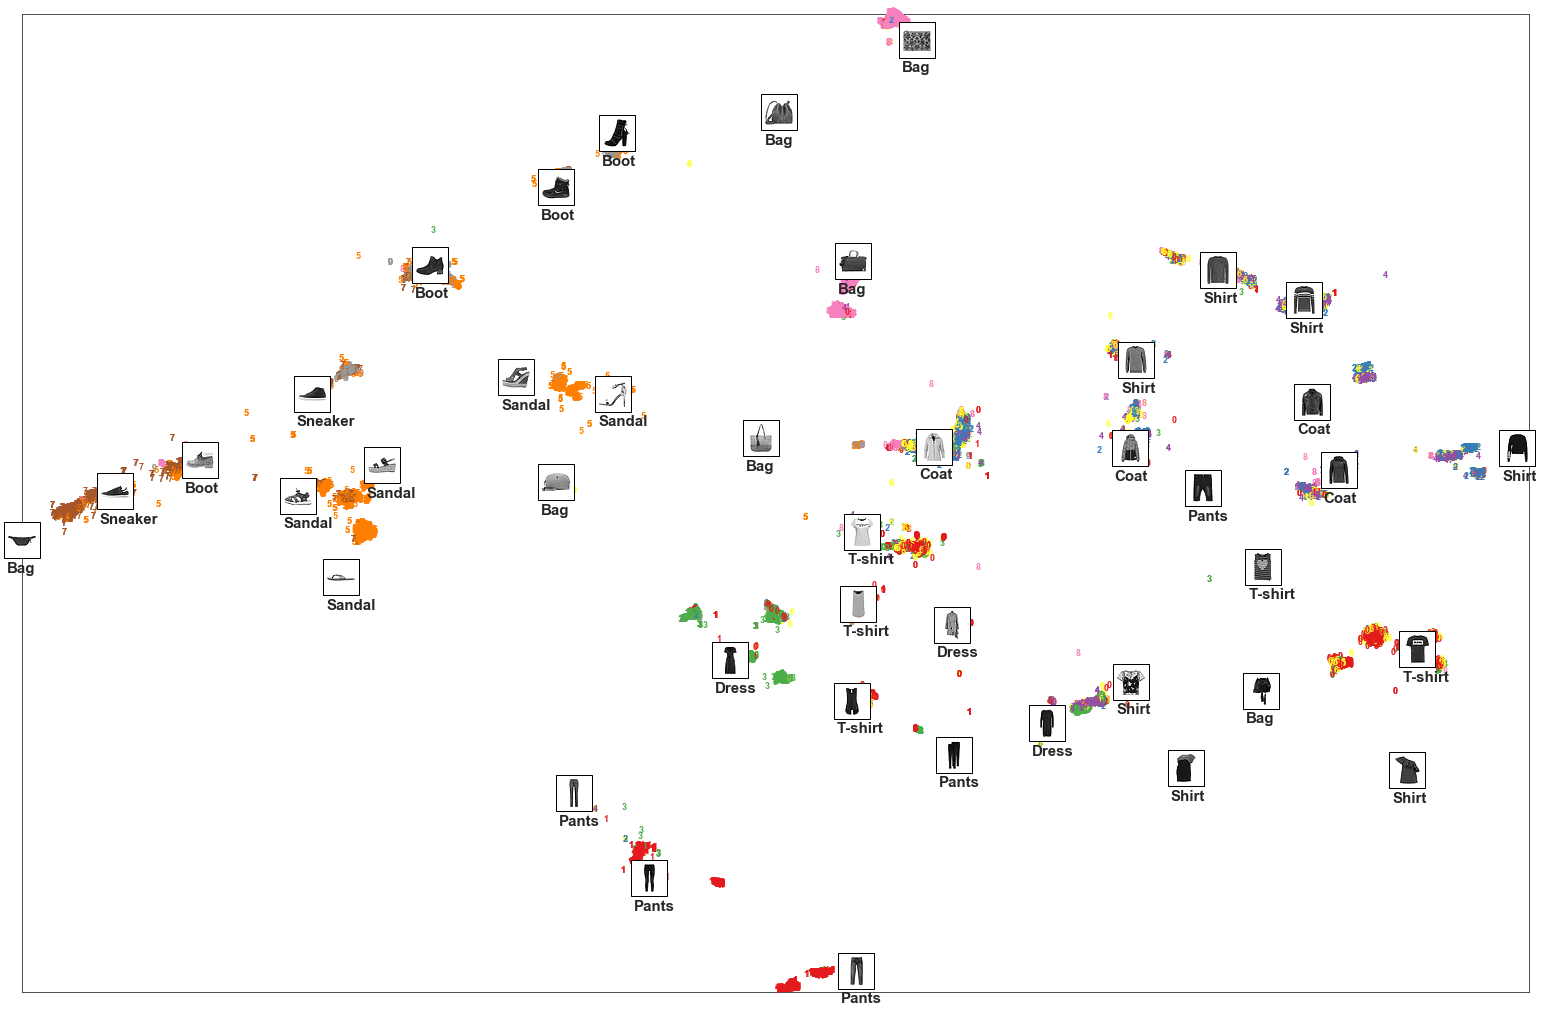

In [18]:
plot_dataset(Z_embedded, y,images=imgs, labels=labels)

https://en.wikipedia.org/wiki/Accuracy_and_precision

https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score

https://kite.com/python/docs/sklearn.utils.linear_assignment_.linear_assignment

cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.23933333333333334
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.243


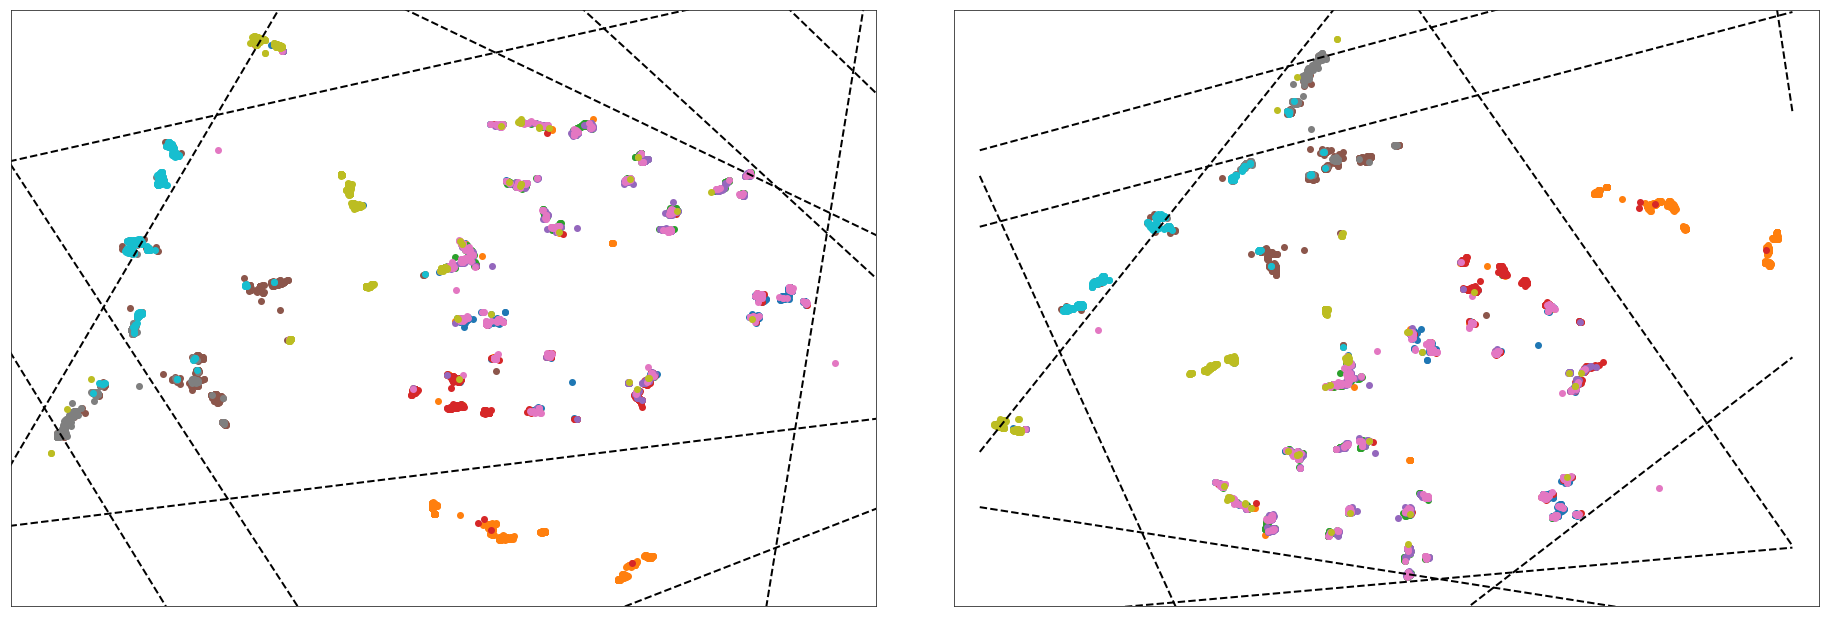

In [19]:
plot_transform_hyperplanes(Z_embedded[randomindexs], pd.get_dummies(y[randomindexs]).values)

In [20]:
from _utils.evaluate import evaluate_clustering 

# Clustering The Z-space

In [21]:
n_clusters = len(np.unique(y[randomindexs]))

In [22]:
# estimate bandwidth for mean shift
from sklearn import cluster, mixture
import hdbscan

from sklearn.neighbors import kneighbors_graph
# connectivity matrix for structured Ward
connectivity = kneighbors_graph(Z_embedded, n_neighbors=n_clusters, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
two_means = cluster.MiniBatchKMeans(n_clusters=n_clusters)
ward = cluster.AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=connectivity)
spectral = cluster.SpectralClustering(n_clusters=n_clusters, eigen_solver='arpack', affinity="nearest_neighbors")
dbscan = cluster.DBSCAN(eps=0.2)
affinity_propagation = cluster.AffinityPropagation()
birch = cluster.Birch(n_clusters=n_clusters)
gmm = mixture.GaussianMixture(n_components=n_clusters, covariance_type='full')
hdbscan_ = hdbscan.HDBSCAN(min_cluster_size=n_clusters, gen_min_span_tree=False)

clustering_algorithms = (
    ('MiniBatchKMeans', two_means),
    ('SpectralClustering', spectral),
    ('Ward', ward),
    ('Birch', birch),
    ('GaussianMixture', gmm),
    ('DBSCAN', dbscan),
    ('HDBSCAN', hdbscan_)
)


## MiniBatch KMeans

In [23]:
import time
for name, algorithm in [clustering_algorithms[0]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting MiniBatchKMeans


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.3157
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.3157142857142857


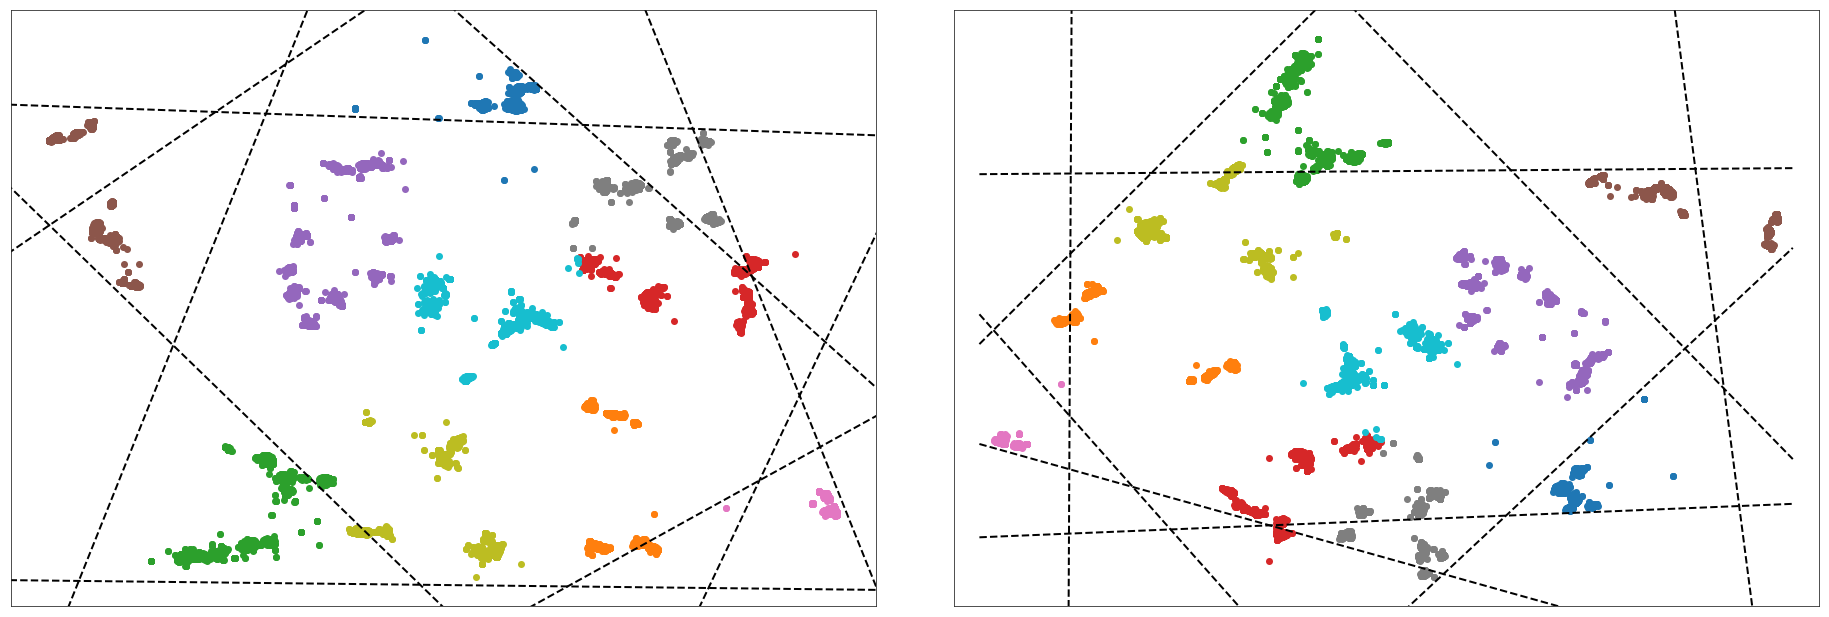

In [24]:
for name, algorithm in [clustering_algorithms[0]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)
    

### Clustering Metrics

In [25]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by MiniBatchKMeans for n_clusters 10
n_clusters orignial 10
n_clusters detected 10
n unclustered points 0 out of 70000
Clustering using MiniBatchKMeans, time elapesd 0.45677828788757324
Clustering Accuracy 0.5530714285714285
Clustering purity 0.5642571428571429
Clustering homogeneity 0.5653456319153574
Clustering adjusted_rand_score 0.4069682497557559
Clustering adjusted_mutual_info_score 0.565236352402563
Clustering completeness_score 0.5775506417161392
Clustering v_measure_score 0.5713829680564856


## Spectral Clustering

In [26]:
import time
for name, algorithm in [clustering_algorithms[1]]:
    t0 = time.time()
    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting SpectralClustering


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.3586857142857143
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.3587


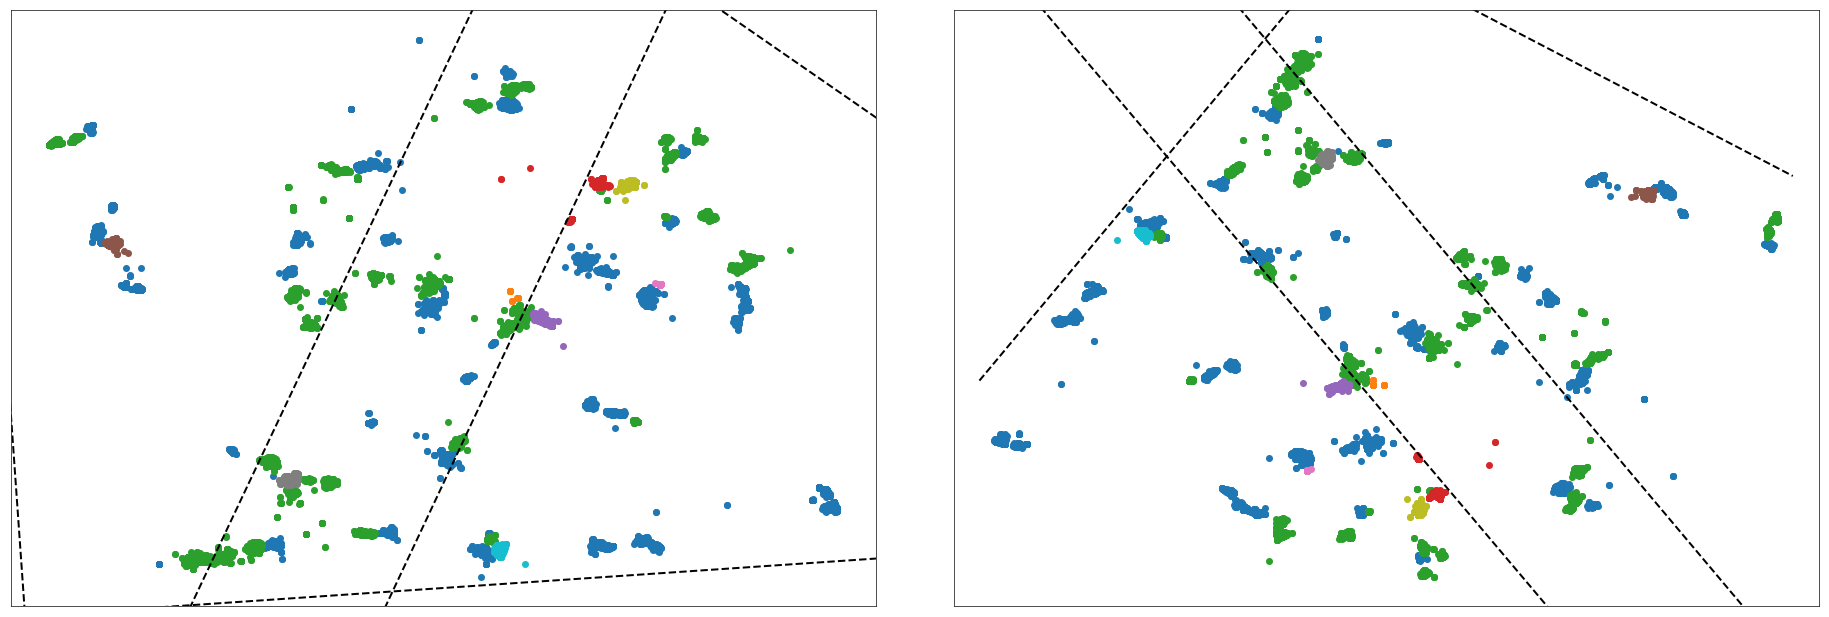

In [27]:
for name, algorithm in [clustering_algorithms[1]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)
    

### Clustering Metrics

In [28]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by SpectralClustering for n_clusters 10
n_clusters orignial 10
n_clusters detected 10
n unclustered points 0 out of 70000
Clustering using SpectralClustering, time elapesd 292.8028779029846
Clustering Accuracy 0.22355714285714287
Clustering purity 0.23218571428571427
Clustering homogeneity 0.11151743862847065
Clustering adjusted_rand_score 0.04692740472195365
Clustering adjusted_mutual_info_score 0.11128879656948565
Clustering completeness_score 0.2307733094795141
Clustering v_measure_score 0.15037069227972183


## Ward

In [29]:
import time
for name, algorithm in [clustering_algorithms[2]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting Ward


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.38884285714285716
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.3886857142857143


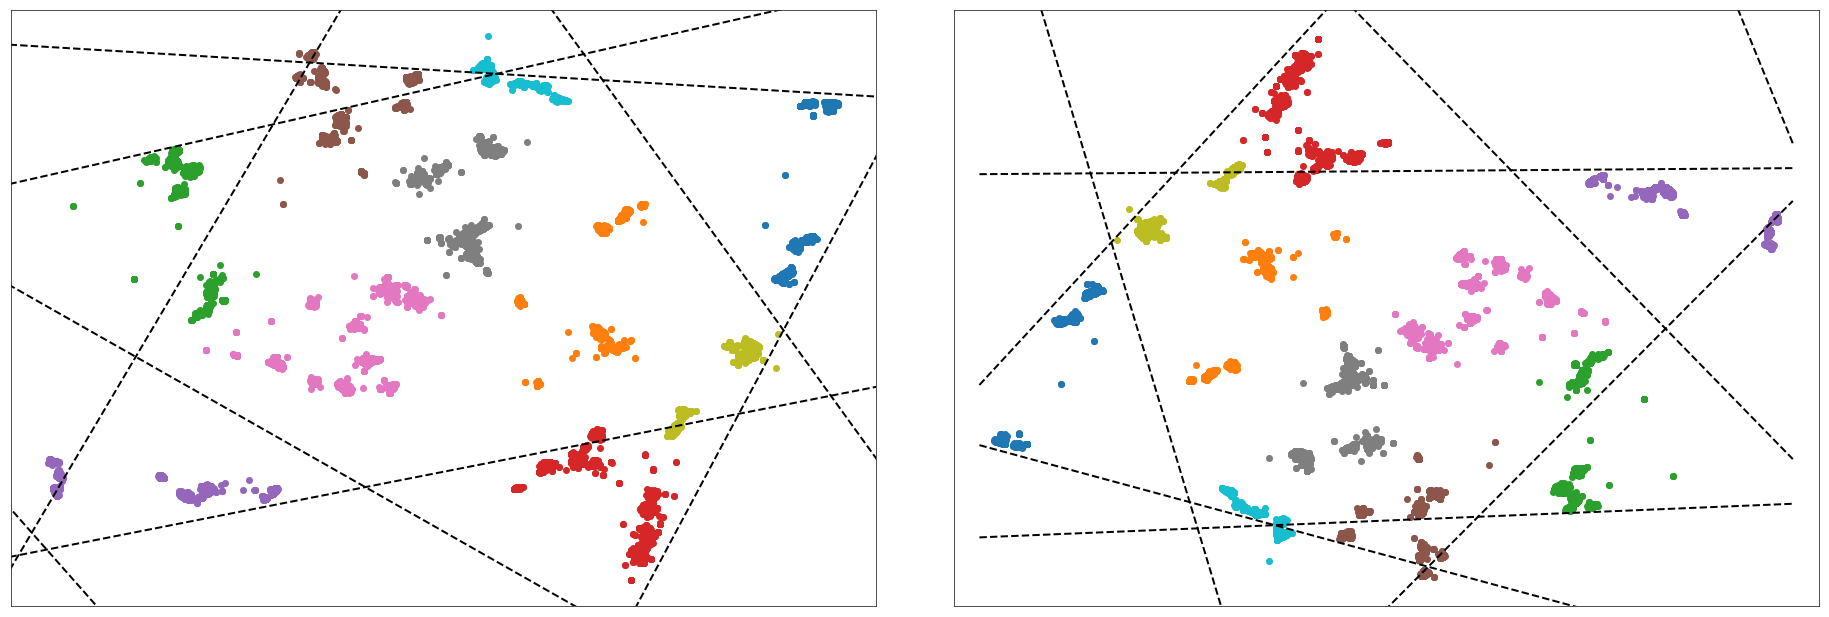

In [30]:
for name, algorithm in [clustering_algorithms[2]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)
    

### Clustering Metrics

In [31]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by Ward for n_clusters 10
n_clusters orignial 10
n_clusters detected 10
n unclustered points 0 out of 70000
Clustering using Ward, time elapesd 43.64791679382324
Clustering Accuracy 0.5113142857142857
Clustering purity 0.5539428571428572
Clustering homogeneity 0.5622650924941249
Clustering adjusted_rand_score 0.39597598192542965
Clustering adjusted_mutual_info_score 0.5621550410222894
Clustering completeness_score 0.5701513660740742
Clustering v_measure_score 0.5661807688429752


## Birch

In [32]:
import time
for name, algorithm in [clustering_algorithms[3]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting Birch


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.38884285714285716
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.3886857142857143


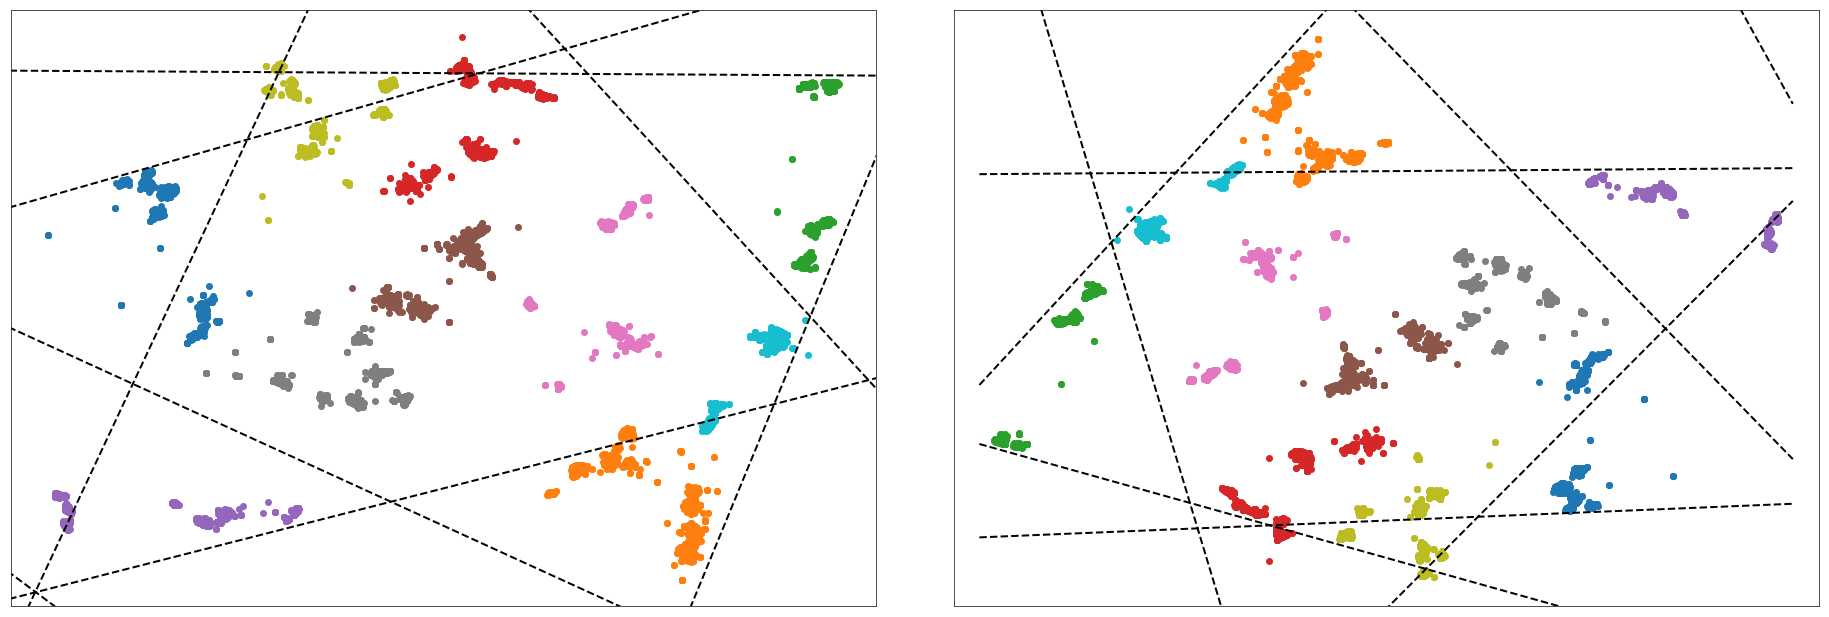

In [33]:
for name, algorithm in [clustering_algorithms[3]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)
    

### Clustering Metrics

In [34]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by Birch for n_clusters 10
n_clusters orignial 10
n_clusters detected 10
n unclustered points 0 out of 70000
Clustering using Birch, time elapesd 2.1963233947753906
Clustering Accuracy 0.5236428571428572
Clustering purity 0.5597428571428571
Clustering homogeneity 0.561467924408489
Clustering adjusted_rand_score 0.3971640950297018
Clustering adjusted_mutual_info_score 0.5613576739821847
Clustering completeness_score 0.5646475964647497
Clustering v_measure_score 0.5630532714147571


## Gaussian Mixture

In [35]:
import time
for name, algorithm in [clustering_algorithms[4]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting GaussianMixture


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.3367142857142857
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.3367142857142857


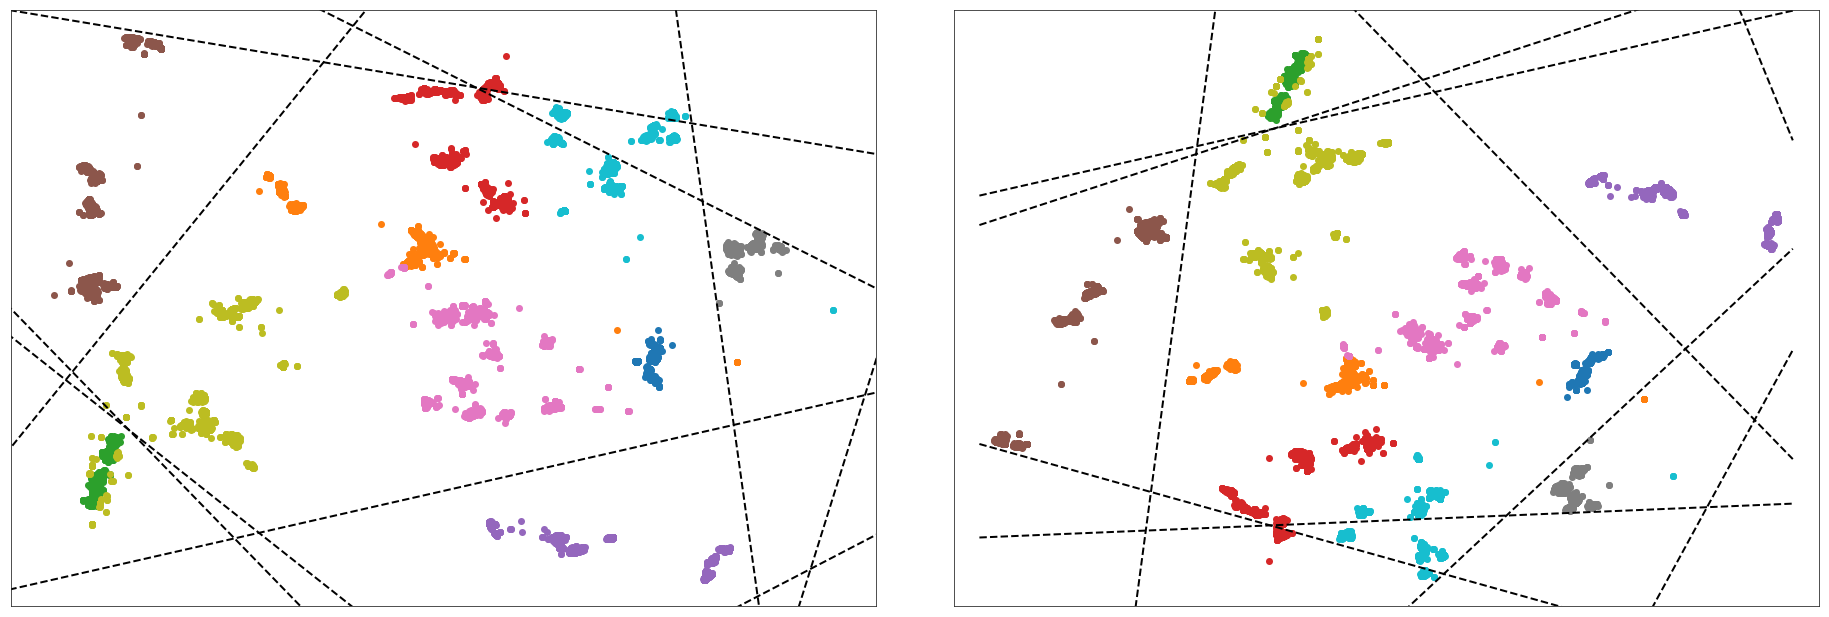

In [36]:
for name, algorithm in [clustering_algorithms[4]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)
    
    

### Clustering Metrics

In [37]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by GaussianMixture for n_clusters 10
n_clusters orignial 10
n_clusters detected 10
n unclustered points 0 out of 70000
Clustering using GaussianMixture, time elapesd 1.048264503479004
Clustering Accuracy 0.5830142857142857
Clustering purity 0.6041857142857143
Clustering homogeneity 0.5646677988404172
Clustering adjusted_rand_score 0.4182009527139027
Clustering adjusted_mutual_info_score 0.5645583492506544
Clustering completeness_score 0.5785617885365214
Clustering v_measure_score 0.571530364912392


## DBSCAN

In [38]:
import time
for name, algorithm in [clustering_algorithms[5]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting DBSCAN


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.06245714285714286
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.06455714285714285


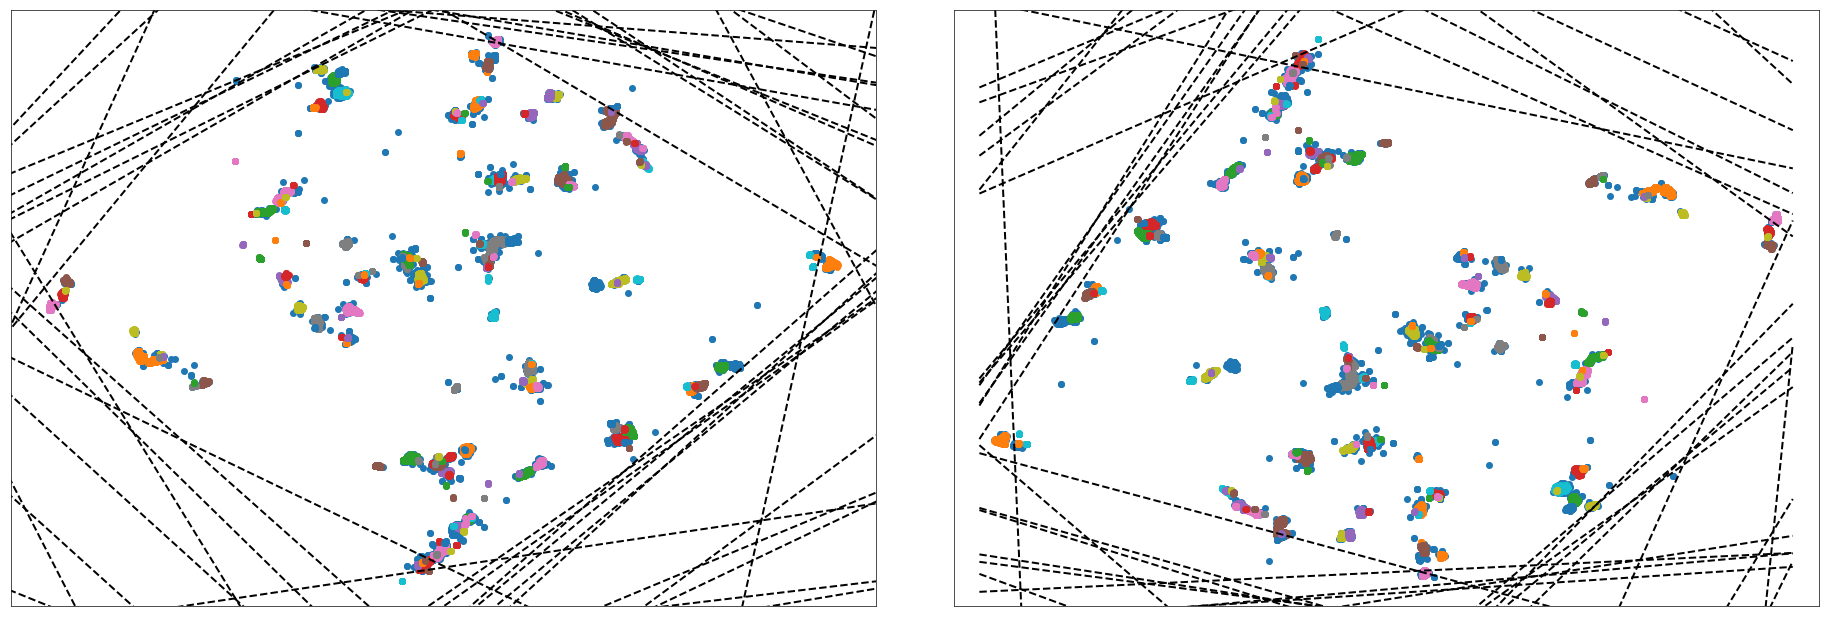

In [39]:
for name, algorithm in [clustering_algorithms[5]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)
    

### Clustering Metrics

In [40]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by DBSCAN for n_clusters 10
n_clusters orignial 10
n_clusters detected 204
n unclustered points 1877 out of 70000
Clustering using DBSCAN, time elapesd 0.7994582653045654
Clustering Accuracy 0.1676232696739721
Clustering purity 0.7677729988403329
Clustering homogeneity 0.7503808319611242
Clustering adjusted_rand_score 0.15716747567713626
Clustering adjusted_mutual_info_score 0.3920549254100667
Clustering completeness_score 0.39403894686284735
Clustering v_measure_score 0.5167321960755947


## HDBSCAN

In [41]:
import time
for name, algorithm in [clustering_algorithms[6]]:
    t0 = time.time()
    
    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting HDBSCAN


C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.0275
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.0289


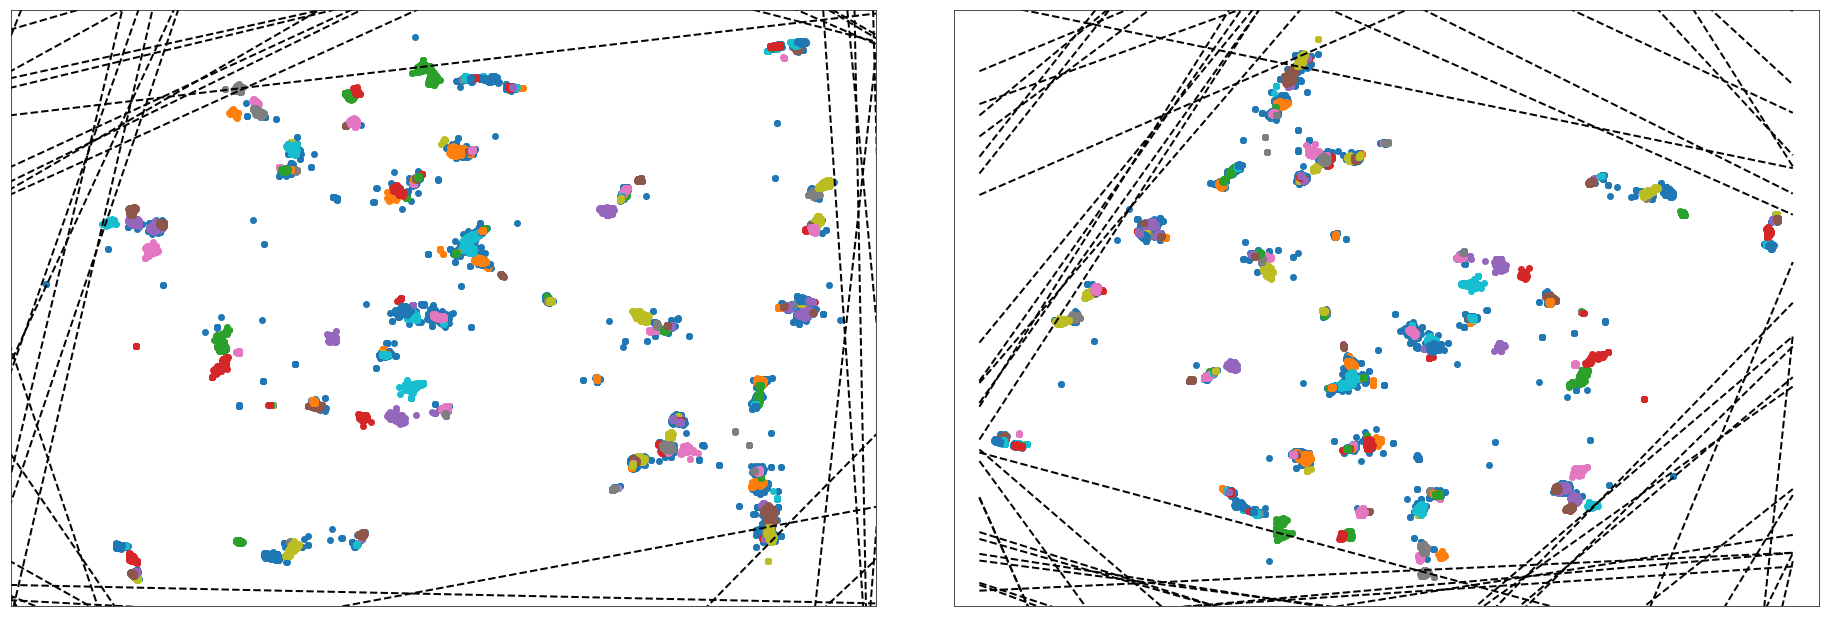

In [42]:
for name, algorithm in [clustering_algorithms[6]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)
    
    

### Clustering Metrics

In [43]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by HDBSCAN for n_clusters 10
n_clusters orignial 10
n_clusters detected 192
n unclustered points 3954 out of 70000
Clustering using HDBSCAN, time elapesd 5.390513896942139
Clustering Accuracy 0.16817066892771704
Clustering purity 0.7796081518941343
Clustering homogeneity 0.7597440897946115
Clustering adjusted_rand_score 0.1441408842171291
Clustering adjusted_mutual_info_score 0.38311326959721614
Clustering completeness_score 0.38497947829484547
Clustering v_measure_score 0.5110157447267039


# Choose number of clusters equals to Harmonic Mean of STD

In [44]:
from scipy.stats import hmean
n_clusters = int(hmean(X.reshape((X.shape[0], -1)).std(axis=1))*255)

In [45]:

# estimate bandwidth for mean shift
from sklearn import cluster, mixture
import hdbscan

from sklearn.neighbors import kneighbors_graph
# connectivity matrix for structured Ward
connectivity = kneighbors_graph(Z_embedded, n_neighbors=n_clusters, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
two_means = cluster.MiniBatchKMeans(n_clusters=n_clusters)
ward = cluster.AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=connectivity)
spectral = cluster.SpectralClustering(n_clusters=n_clusters, eigen_solver='arpack', affinity="nearest_neighbors")
dbscan = cluster.DBSCAN(eps=0.2)
affinity_propagation = cluster.AffinityPropagation()
birch = cluster.Birch(n_clusters=n_clusters)
gmm = mixture.GaussianMixture(n_components=n_clusters, covariance_type='full')
hdbscan_ = hdbscan.HDBSCAN(min_cluster_size=n_clusters, gen_min_span_tree=False)

clustering_algorithms = (
    ('MiniBatchKMeans', two_means),
    ('SpectralClustering', spectral),
    ('Ward', ward),
    ('Birch', birch),
    ('GaussianMixture', gmm),
    ('DBSCAN', dbscan),
    ('HDBSCAN', hdbscan_)
)


## MiniBatch KMeans

In [46]:
import time
for name, algorithm in [clustering_algorithms[0]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting MiniBatchKMeans


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.05277142857142857
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.054657142857142856


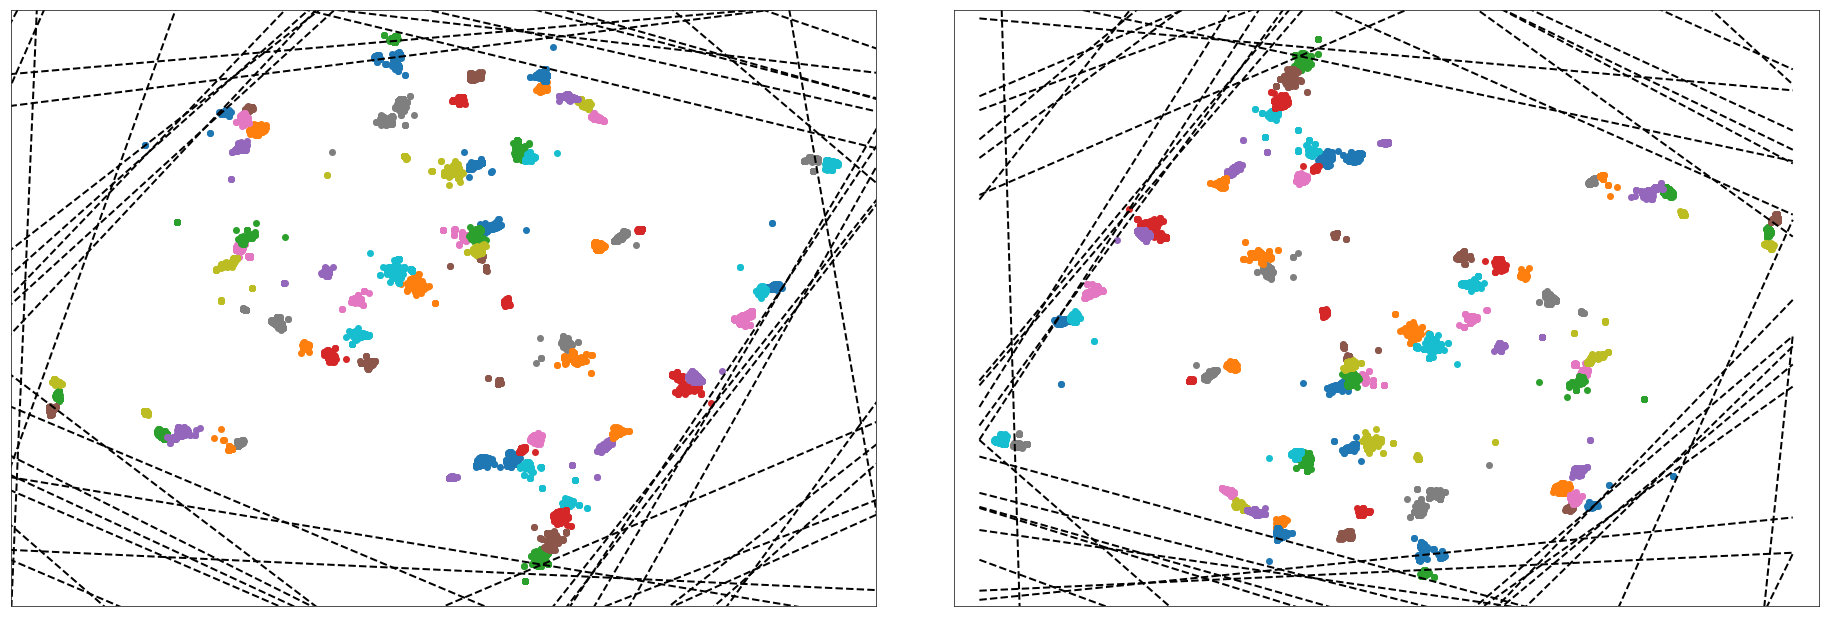

In [47]:
for name, algorithm in [clustering_algorithms[0]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)
    

### Clustering Metrics

In [48]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by MiniBatchKMeans for n_clusters 75
n_clusters orignial 10
n_clusters detected 75
n unclustered points 0 out of 70000
Clustering using MiniBatchKMeans, time elapesd 0.2305905818939209
Clustering Accuracy 0.17227142857142858
Clustering purity 0.7487285714285714
Clustering homogeneity 0.7245813965393553
Clustering adjusted_rand_score 0.15847511054598903
Clustering adjusted_mutual_info_score 0.3940606147993147
Clustering completeness_score 0.3947445134051177
Clustering v_measure_score 0.5110656838337949


## Spectral Clustering

In [49]:
import time
for name, algorithm in [clustering_algorithms[1]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting SpectralClustering


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.0
pca + OneVsRestClassifier + LogisticRegression accuracy_score 4.2857142857142856e-05


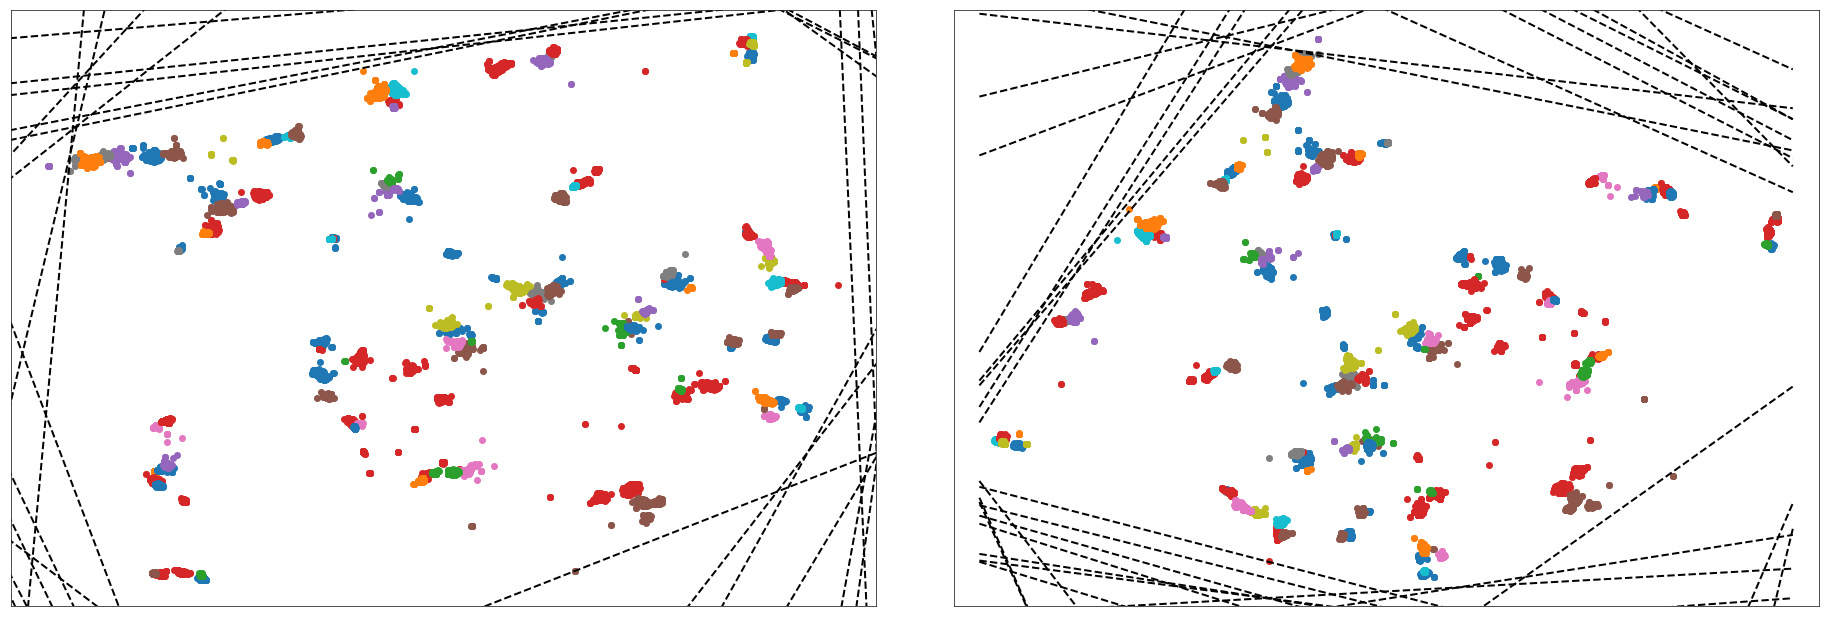

In [50]:
for name, algorithm in [clustering_algorithms[1]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)
    

### Clustering Metrics

In [51]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by SpectralClustering for n_clusters 75
n_clusters orignial 10
n_clusters detected 75
n unclustered points 0 out of 70000
Clustering using SpectralClustering, time elapesd 199.42335033416748
Clustering Accuracy 0.1748
Clustering purity 0.4483714285714286
Clustering homogeneity 0.3692018596257983
Clustering adjusted_rand_score 0.055048404356008
Clustering adjusted_mutual_info_score 0.2729916281093645
Clustering completeness_score 0.2741241691897433
Clustering v_measure_score 0.3146372088179536


## Ward

In [52]:
import time
for name, algorithm in [clustering_algorithms[2]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting Ward


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.062085714285714286
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.0627


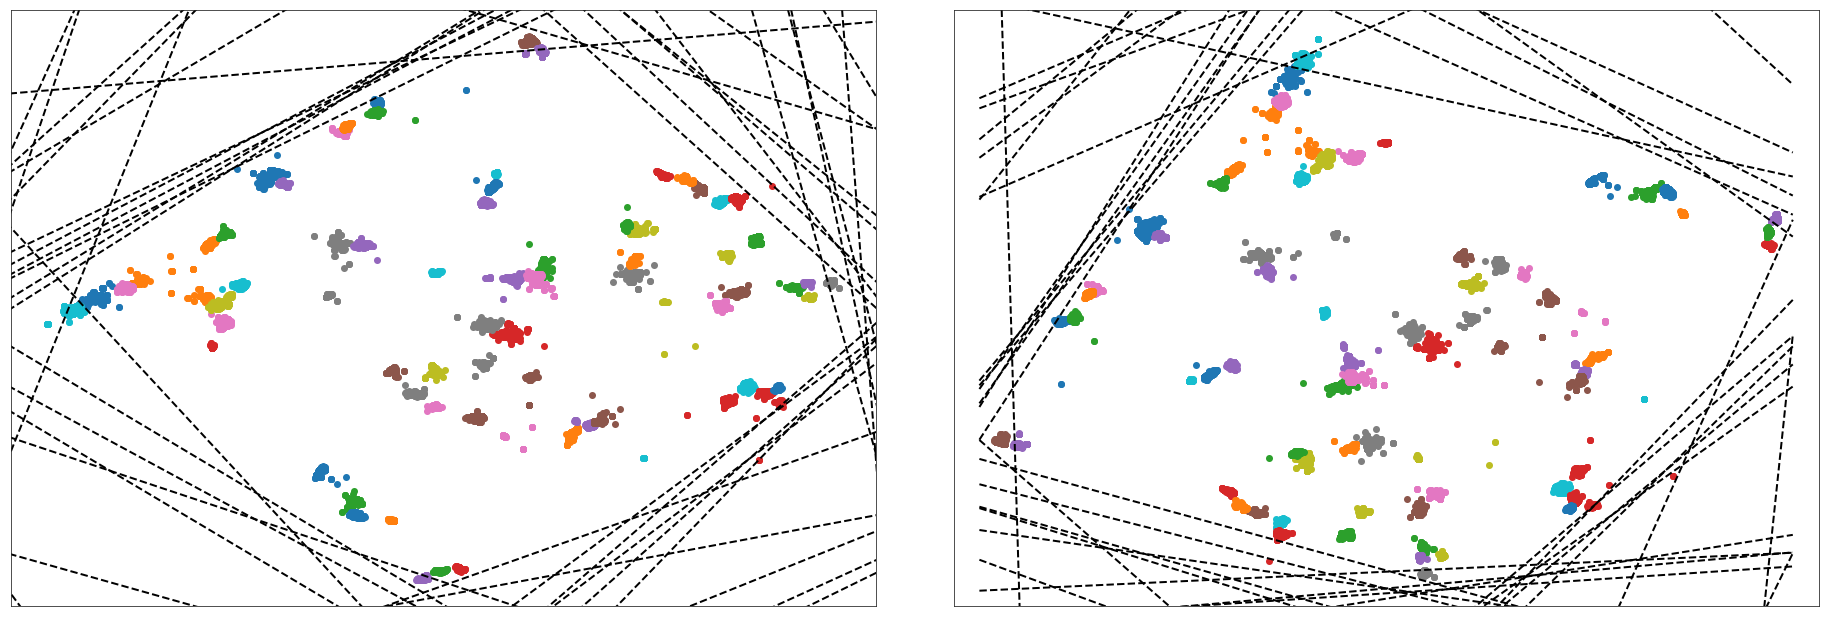

In [53]:
for name, algorithm in [clustering_algorithms[2]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)
    

### Clustering Metrics

In [54]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by Ward for n_clusters 75
n_clusters orignial 10
n_clusters detected 75
n unclustered points 0 out of 70000
Clustering using Ward, time elapesd 79.41544914245605
Clustering Accuracy 0.1647142857142857
Clustering purity 0.7526428571428572
Clustering homogeneity 0.7241857366407297
Clustering adjusted_rand_score 0.16055466553524866
Clustering adjusted_mutual_info_score 0.3938657859881397
Clustering completeness_score 0.39455157981402783
Clustering v_measure_score 0.5108055702939277


## Birch

In [55]:
import time
for name, algorithm in [clustering_algorithms[3]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting Birch


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.1013
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.11158571428571429


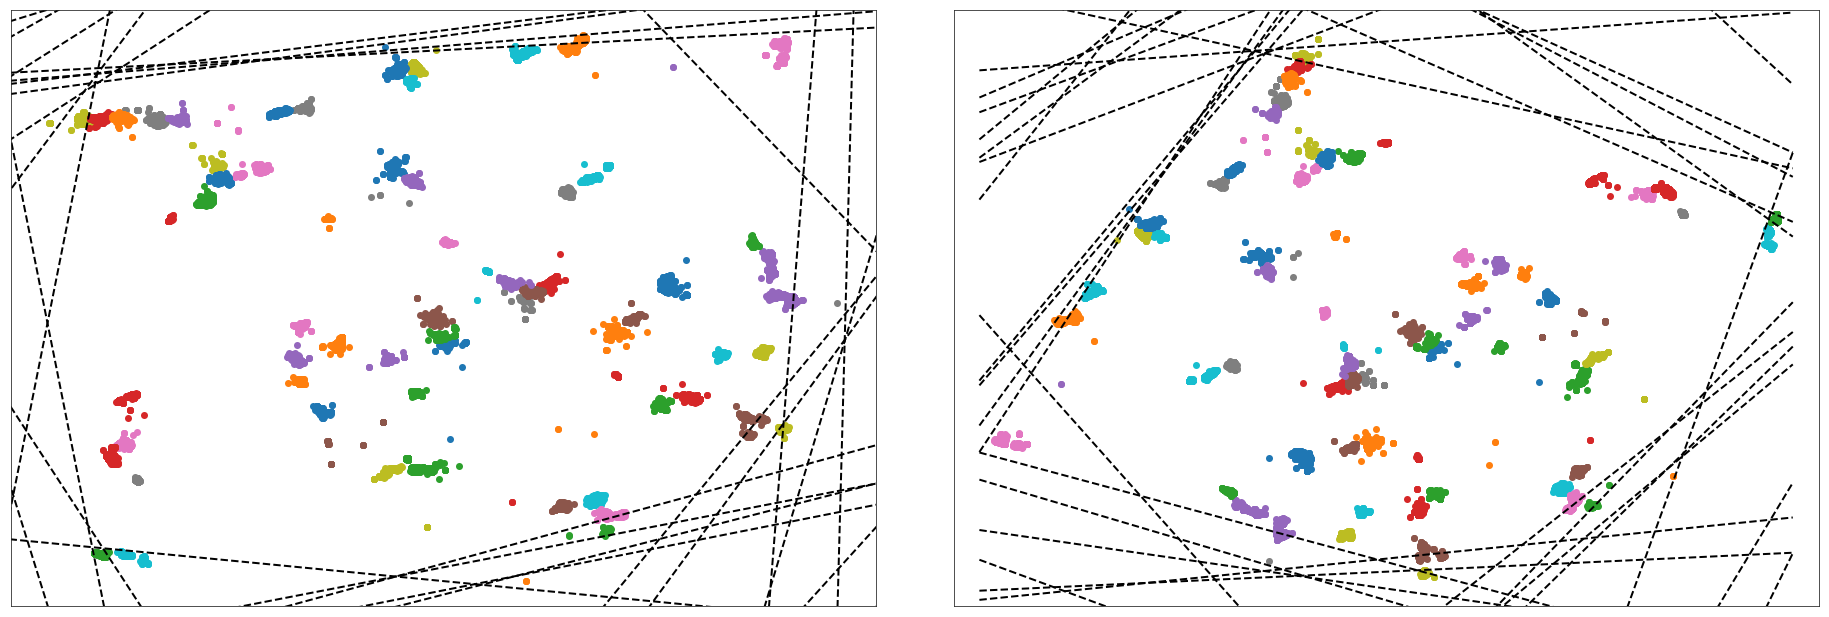

In [56]:
for name, algorithm in [clustering_algorithms[3]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)
    

### Clustering Metrics

In [57]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by Birch for n_clusters 75
n_clusters orignial 10
n_clusters detected 75
n unclustered points 0 out of 70000
Clustering using Birch, time elapesd 1.875056266784668
Clustering Accuracy 0.19667142857142858
Clustering purity 0.7491
Clustering homogeneity 0.7222215511768143
Clustering adjusted_rand_score 0.18572853165076791
Clustering adjusted_mutual_info_score 0.4079826912168968
Clustering completeness_score 0.40866793551072844
Clustering v_measure_score 0.5219763624565947


## Gaussian Mixture

In [58]:
import time
for name, algorithm in [clustering_algorithms[4]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting GaussianMixture


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.0597
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.06211428571428571


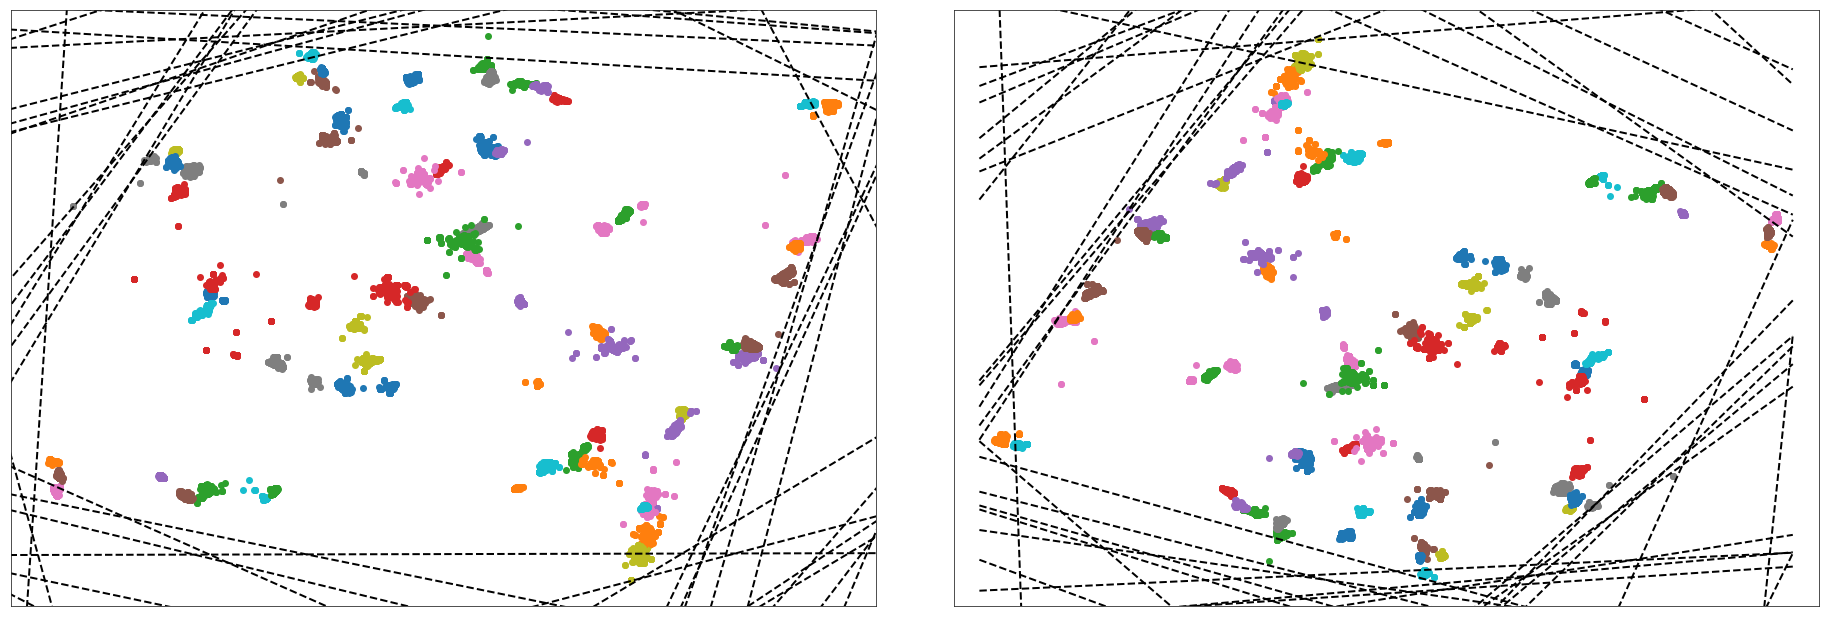

In [59]:
for name, algorithm in [clustering_algorithms[4]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)
    

### Clustering Metrics

In [60]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by GaussianMixture for n_clusters 75
n_clusters orignial 10
n_clusters detected 75
n unclustered points 0 out of 70000
Clustering using GaussianMixture, time elapesd 6.599344491958618
Clustering Accuracy 0.16632857142857144
Clustering purity 0.7476714285714285
Clustering homogeneity 0.7231156633328478
Clustering adjusted_rand_score 0.15857344903683307
Clustering adjusted_mutual_info_score 0.39289938692964094
Clustering completeness_score 0.393583954617592
Clustering v_measure_score 0.5097283420635981


## DBSCAN

In [61]:
import time
for name, algorithm in [clustering_algorithms[5]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting DBSCAN


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.06245714285714286
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.06455714285714285


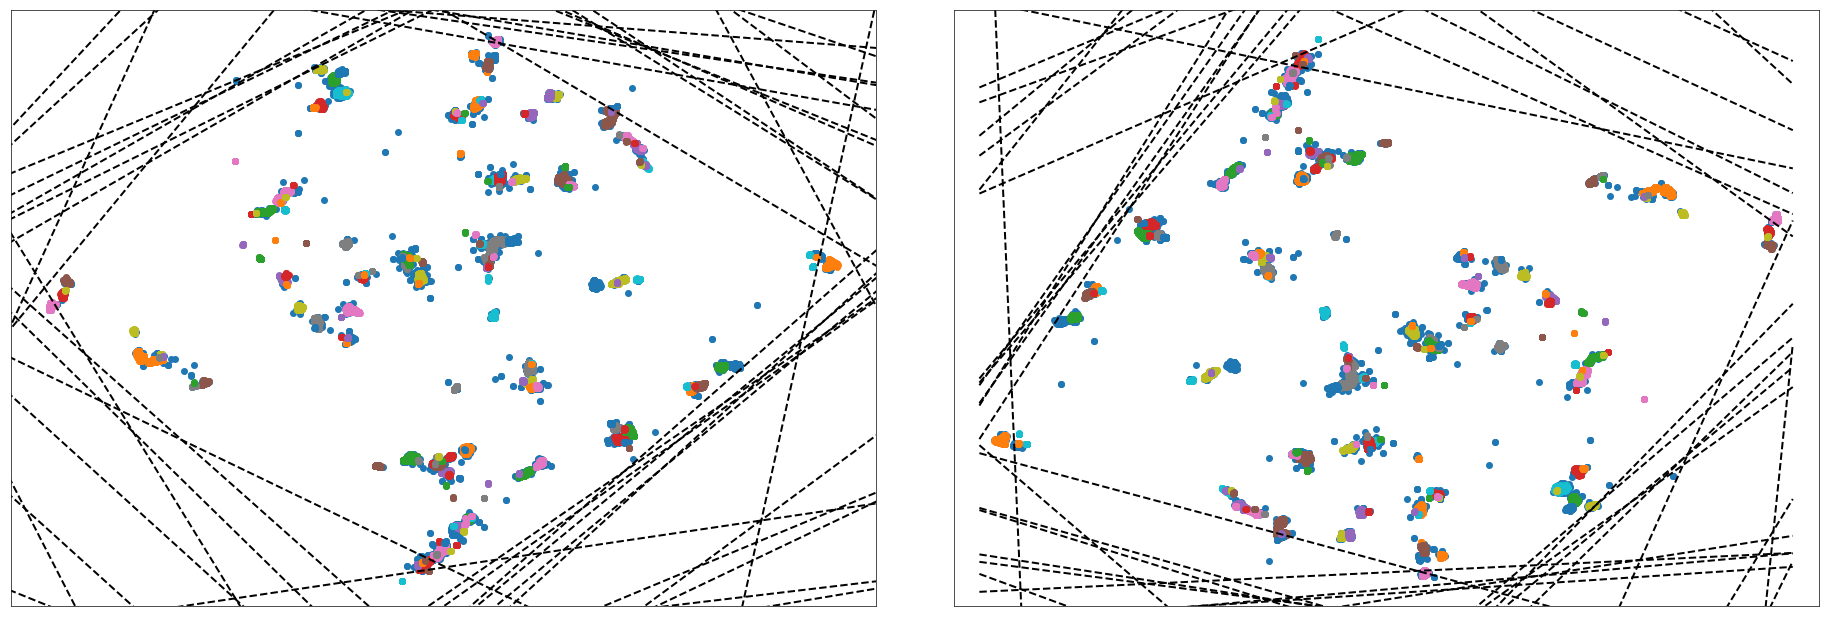

In [62]:
for name, algorithm in [clustering_algorithms[5]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)
    
    

### Clustering Metrics

In [63]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by DBSCAN for n_clusters 75
n_clusters orignial 10
n_clusters detected 204
n unclustered points 1877 out of 70000
Clustering using DBSCAN, time elapesd 0.752371072769165
Clustering Accuracy 0.1676232696739721
Clustering purity 0.7677729988403329
Clustering homogeneity 0.7503808319611242
Clustering adjusted_rand_score 0.15716747567713626
Clustering adjusted_mutual_info_score 0.3920549254100667
Clustering completeness_score 0.39403894686284735
Clustering v_measure_score 0.5167321960755947


## HDBSCAN

In [64]:
import time
for name, algorithm in [clustering_algorithms[6]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting HDBSCAN


C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.03167142857142857
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.03312857142857143


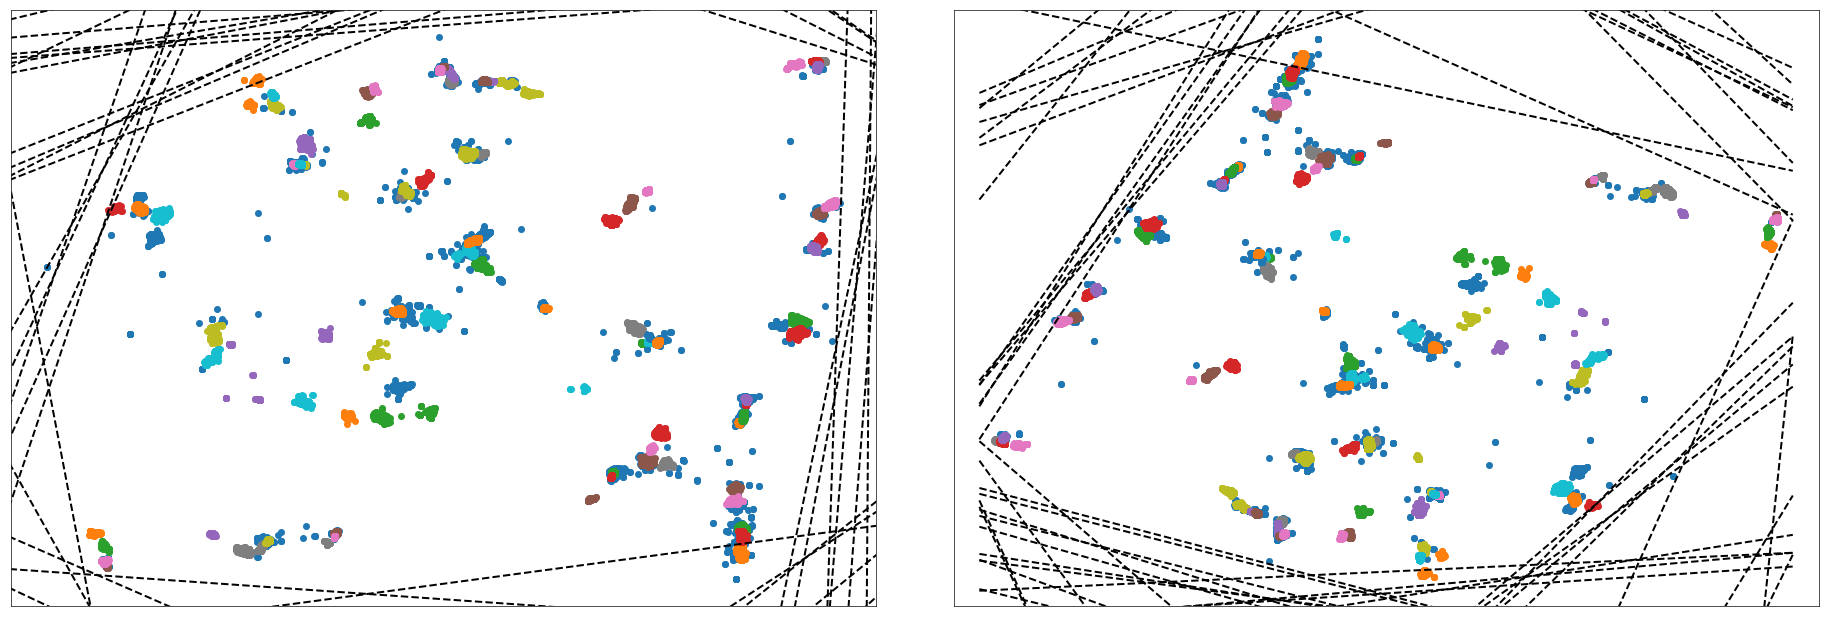

In [65]:
for name, algorithm in [clustering_algorithms[6]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)
    

### Clustering Metrics

In [66]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by HDBSCAN for n_clusters 75
n_clusters orignial 10
n_clusters detected 102
n unclustered points 3221 out of 70000
Clustering using HDBSCAN, time elapesd 4.6578569412231445
Clustering Accuracy 0.1656658530376316
Clustering purity 0.7783135416822654
Clustering homogeneity 0.7482751418329575
Clustering adjusted_rand_score 0.14268992679650366
Clustering adjusted_mutual_info_score 0.3873004475780923
Clustering completeness_score 0.38823540201406465
Clustering v_measure_score 0.5112260543105926


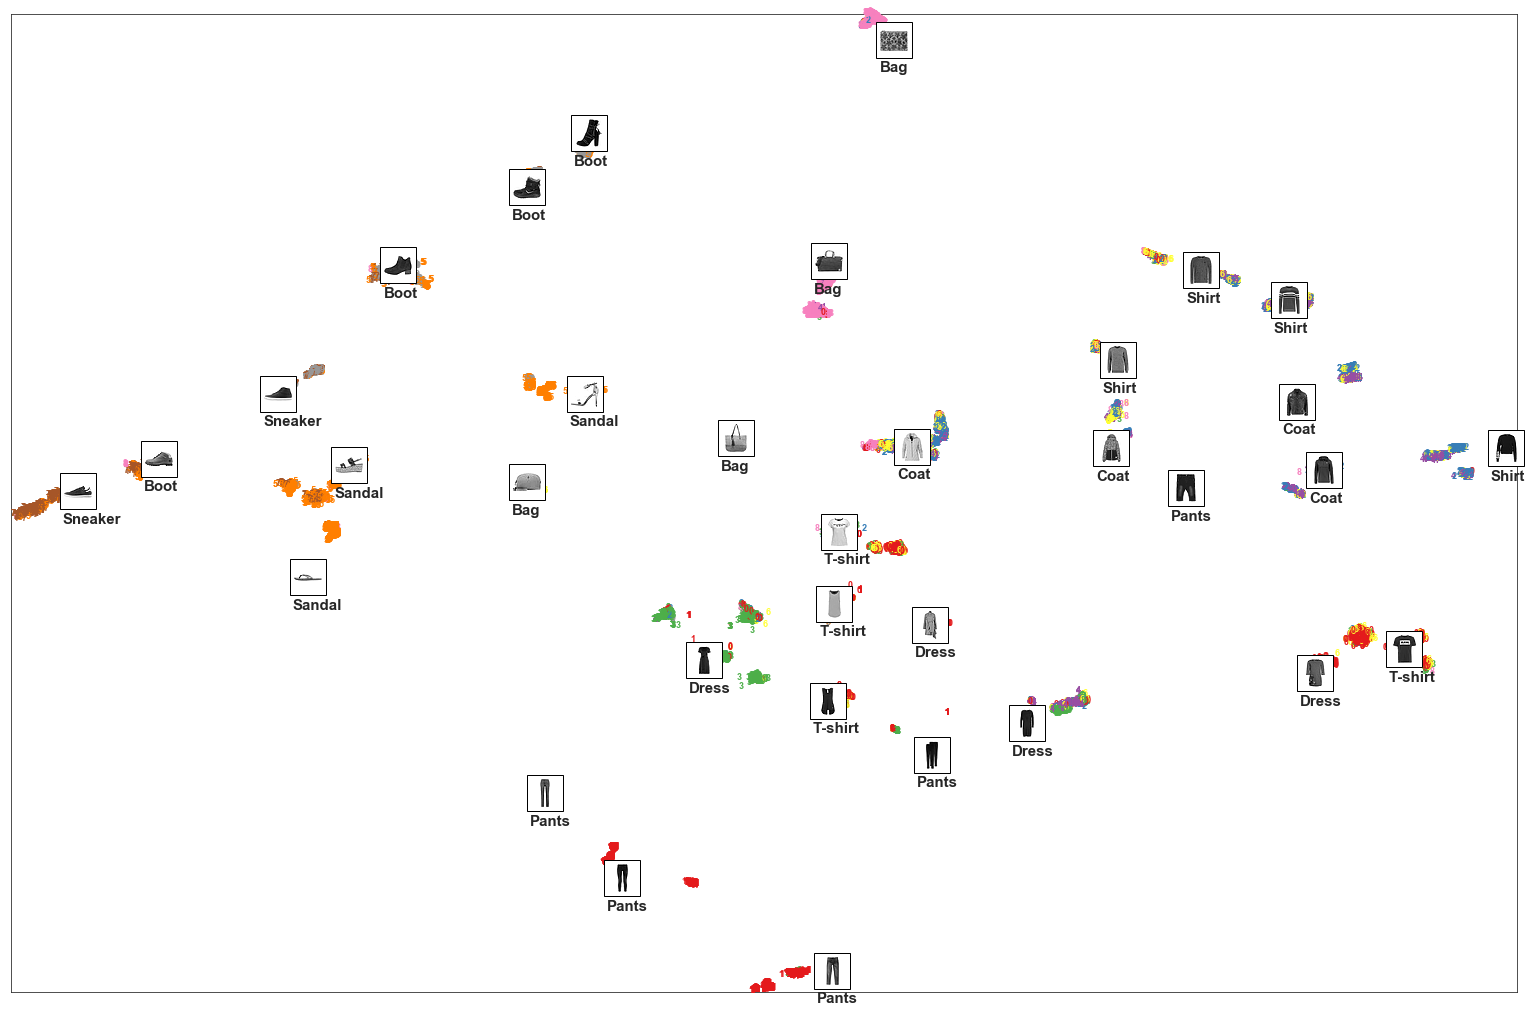

In [67]:
plot_dataset(Z_embedded[y_pred!=-1], y[y_pred!=-1],images=imgs[y_pred!=-1], labels=labels)

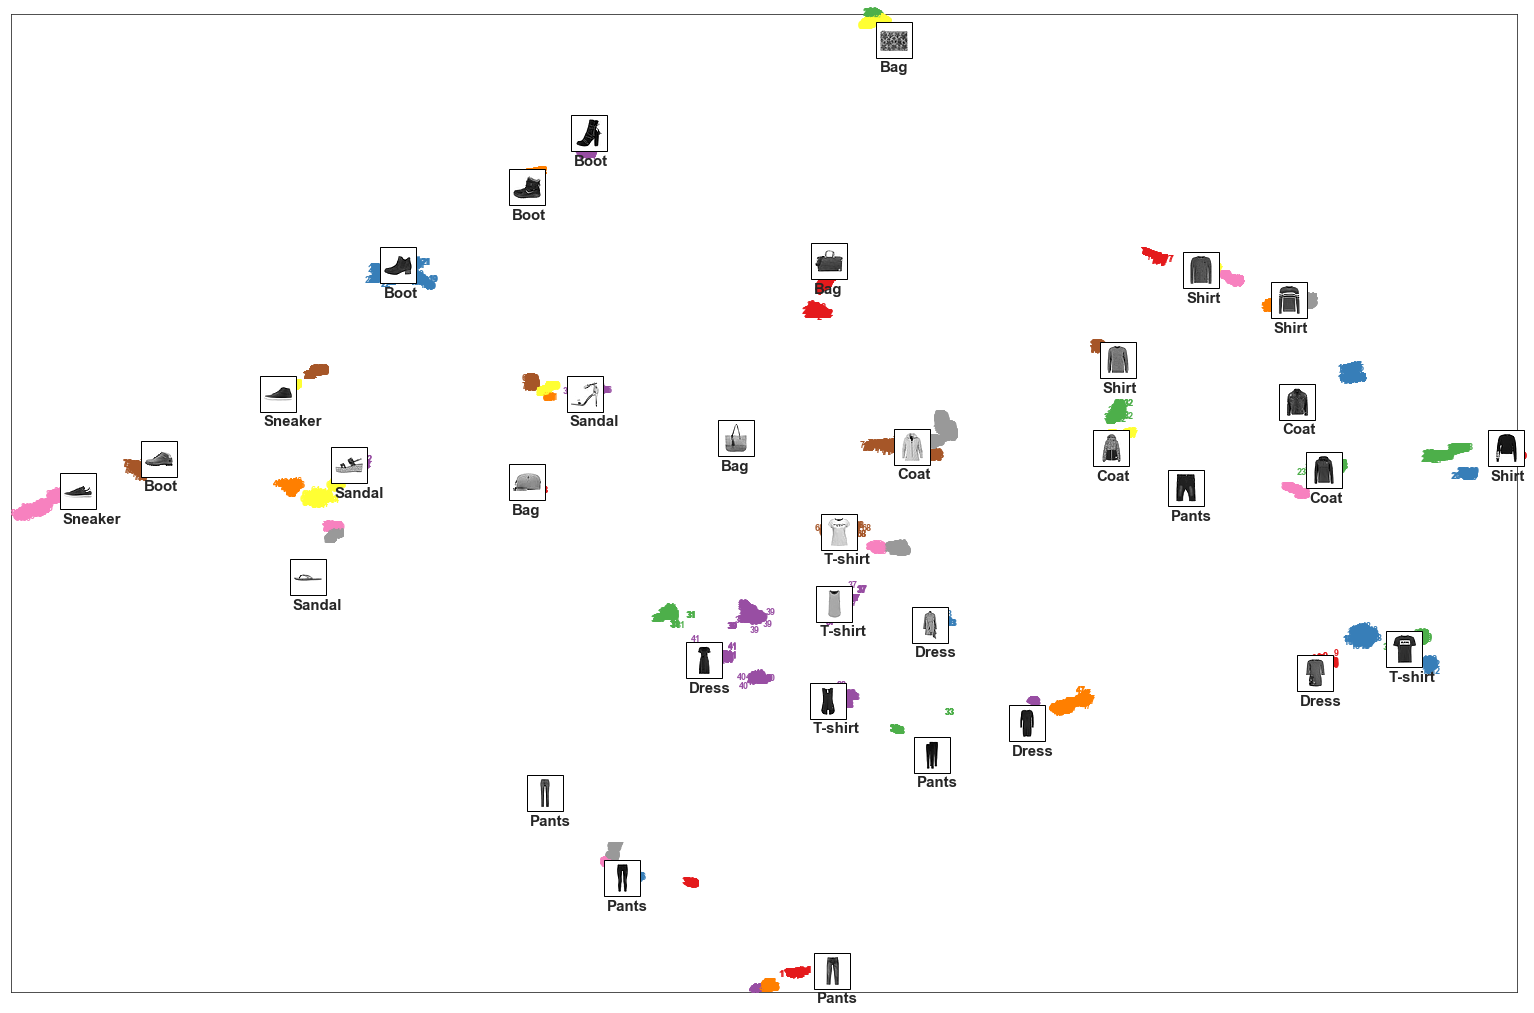

In [69]:
plot_dataset(Z_embedded[y_pred!=-1], y_pred[y_pred!=-1],images=imgs[y_pred!=-1], y_original=y[y_pred!=-1], labels=labels)


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.03330388295721709
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.03472648587130685


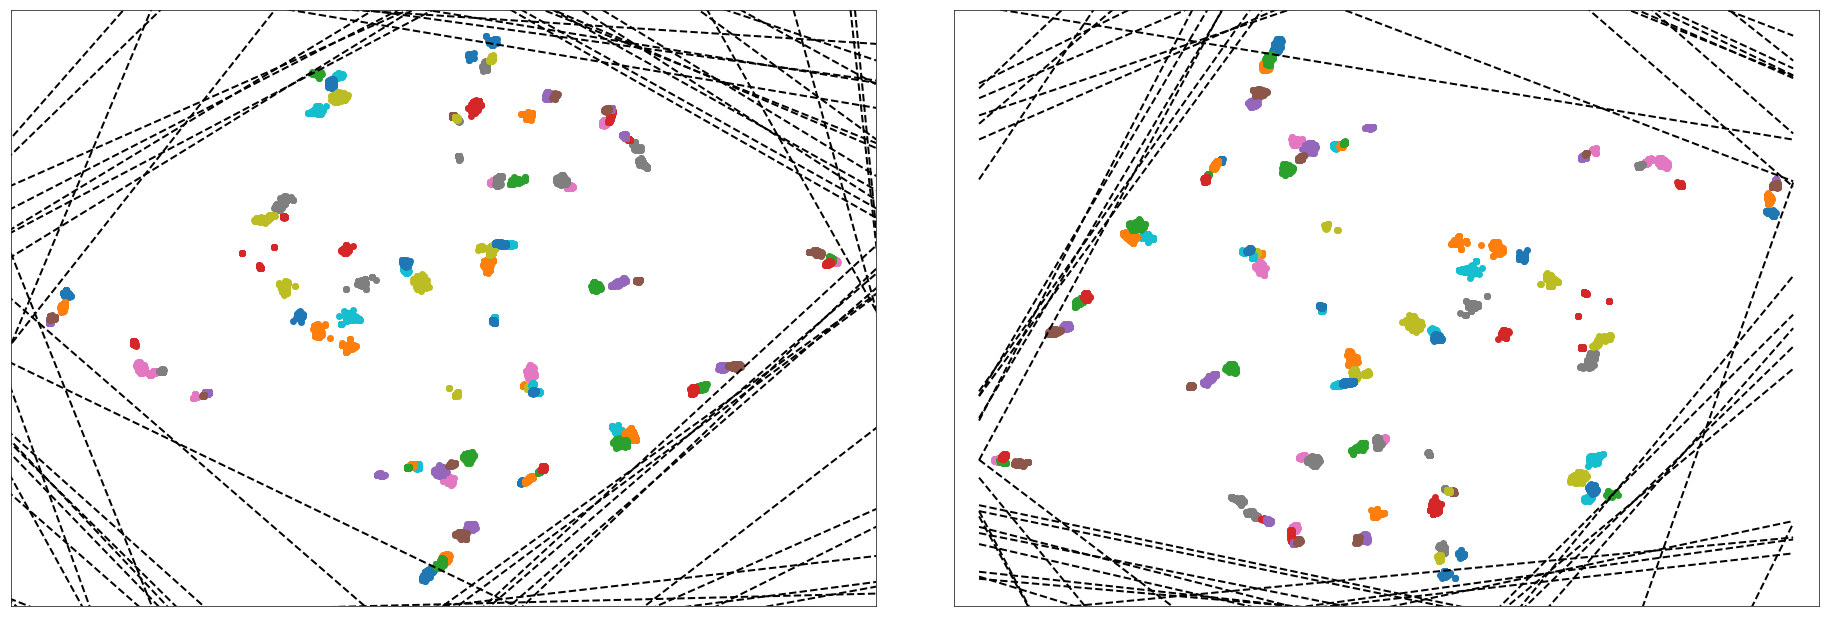

In [70]:
plot_transform_hyperplanes(Z_embedded[y_pred!=-1], pd.get_dummies(y_pred[y_pred!=-1]).values)
    

In [ ]:
embedding_Z_space = {'X': X[y_pred!=-1], 
                     'Z': Z_embedded[y_pred!=-1], 
                     'y_cluster': y_pred[y_pred!=-1],
                     'images':imgs[y_pred!=-1]} 

In [ ]:
import pickle
with open('./experiments/manifold generation/{}_{}.pkl'.format(dataset_name, name), 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(embedding_Z_space, f, pickle.HIGHEST_PROTOCOL)
    